In [539]:
import numpy as np

In [540]:
import pandas as pd 
    
#df_BenefitsCostSharing = pd.read_csv('BenefitsCostSharing.csv')
#df_BusinessRules= pd.read_csv('BusinessRules.csv')
#df_Network= pd.read_csv('Network.csv')
#df_PlanAttributes= pd.read_csv('PlanAttributes.csv')
df_Rate= pd.read_csv('Rate.csv')
#df_ServiceArea= pd.read_csv('ServiceArea.csv')

In [541]:
df_Rate.shape

(12694445, 24)

## rate dataset

In [542]:
df_Rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [543]:
# Randomly sample 5% of your dataframe
df_05_data = df_Rate.sample(frac=0.01)
df_05_data=df_05_data.reset_index()

## drop the column generated
df_05_data=df_05_data.drop(['index'], axis=1)
df_05_data.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2015,WI,69380,HIOS,3,2014-08-05 13:28:44,69380,57-0523959,2015-01-01,2015-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
1,2014,GA,50988,HIOS,5,2013-09-12 11:27:35,50988,86-0307623,2014-01-01,2014-12-31,...,11.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1795
2,2014,FL,49193,HIOS,4,2013-09-10 14:43:20,49193,86-0307623,2014-01-01,2014-12-31,...,19.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48188
3,2014,GA,73231,HIOS,6,2013-11-26 13:14:08,73231,47-0397286,2014-01-01,2014-12-31,...,21.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
4,2016,LA,19636,HIOS,6,2015-08-26 09:56:12,19636,72-1071369,2016-01-01,2016-12-31,...,308.03,378.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2567


In [544]:
df_05_data.shape

(126944, 24)

In [545]:
## how many NA
df_05_data.isnull().sum()


BusinessYear                                      0
StateCode                                         0
IssuerId                                          0
SourceName                                        0
VersionNum                                        0
ImportDate                                        0
IssuerId2                                         0
FederalTIN                                        0
RateEffectiveDate                                 0
RateExpirationDate                                0
PlanId                                            0
RatingAreaId                                      0
Tobacco                                           0
Age                                               0
IndividualRate                                    0
IndividualTobaccoRate                         77627
Couple                                       126549
PrimarySubscriberAndOneDependent             126549
PrimarySubscriberAndTwoDependents            126549
PrimarySubsc

In [546]:
## individual rate hase some outliers
print df_05_data['IndividualRate'].describe()


count    126944.000000
mean       4177.151697
std       61864.041589
min           0.000000
25%          29.260000
50%         292.305000
75%         479.972500
max      999999.000000
Name: IndividualRate, dtype: float64


In [547]:
## create different datasets for family plan and different rates of pamily plan, 
## and tobacco users/not users

In [548]:
import copy
df_no_99=copy.deepcopy(df_05_data)
df_with_99=copy.deepcopy(df_05_data)
df_no_tobacco=copy.deepcopy(df_05_data)
df_with_tobacco=copy.deepcopy(df_05_data)

In [549]:
## keep 999999.000000
df_no_99 = df_no_99[df_no_99.IndividualRate !=999999.00]
df_no_99 = df_no_99[df_no_99.IndividualRate !=9999.990000]
df_no_99 = df_no_99[df_no_99.IndividualRate !=9999.0000]
df_no_99 = df_no_99[df_no_99.IndividualRate <= 2000.00]
df_with_99=df_with_99[df_with_99.IndividualRate ==999999.00]
df_no_tobacco=df_no_tobacco[df_no_tobacco.Tobacco == 'User No Preference']
df_with_tobacco=df_with_tobacco[df_with_tobacco.Tobacco == 'Tobacco User/Non-Tobacco' ]

In [550]:
df_05=copy.deepcopy(df_no_99)

In [551]:
df_no_99.shape

(126190, 24)

In [552]:
634722-630952

3770

## extra information


print (df_05.ix[df_05.IndividualRate.idxmax()])
print (df_05.IndividualRate.idxmax())
df_05.iloc[[96]]
df_05.iloc[96, df_05.columns.get_loc('IndividualRate')] = 100
df_05.loc[df_05['IndividualRate'] == 999999]
df = pandas.DataFrame(columns=['to','fr','ans'])
df.to = [pandas.Timestamp('2014-01-01 ')]
df.fr = [pandas.Timestamp('2014-12-31')]
((df.fr-df.to)/24).astype('timedelta64[h]')
import pandas
df = pandas.DataFrame(columns=['to','fr','ans'])
df.to = [pandas.Timestamp('2014-01-01 ')]
df.fr = [pandas.Timestamp('2014-12-31')]
((df.fr-df.to)/24).astype('timedelta64[h]')

In [553]:
## calculate the length of the plan no $999999
df_05['RateEffectiveDate'] = pd.to_datetime(df_05['RateEffectiveDate'])
df_05['RateExpirationDate'] = pd.to_datetime(df_05['RateExpirationDate'])


df_05.dtypes  # if already datetime64 you don't need to use to_datetime
df_05['days'] = (df_05['RateExpirationDate']-df_05['RateEffectiveDate']).apply(str)


In [554]:
df_05['days'] = df_05['days'].str.replace(' 00:00:00', '')
df_05['days'] = df_05['days'].str.replace(' 00:00:00', '')

In [555]:
df_05['days']

0         364 days
1         364 days
2         364 days
3         364 days
4         365 days
5          91 days
6          91 days
7         364 days
8         364 days
9         365 days
10        365 days
11         89 days
12         91 days
13         91 days
14        364 days
15         89 days
16        364 days
17         90 days
18         91 days
19         91 days
20         91 days
21        365 days
22         91 days
23        365 days
24         90 days
25        364 days
26         89 days
27        365 days
28         91 days
29         91 days
            ...   
126914     90 days
126915     90 days
126916     91 days
126917    364 days
126918    364 days
126919     90 days
126920     91 days
126921    364 days
126922     89 days
126923     91 days
126924    365 days
126925    364 days
126926     90 days
126927     90 days
126928    365 days
126929    364 days
126930    364 days
126931     91 days
126932    364 days
126933    365 days
126934     89 days
126935     9

In [556]:
## not necessary
print df_05['PlanId'].describe()

count             126190
unique             13160
top       16842FL0010002
freq                 388
Name: PlanId, dtype: object


In [557]:
## two categories (Tobacco User/Non-Tobacco User)
print df_05['Tobacco'].describe()

count            126190
unique                2
top       No Preference
freq              77315
Name: Tobacco, dtype: object


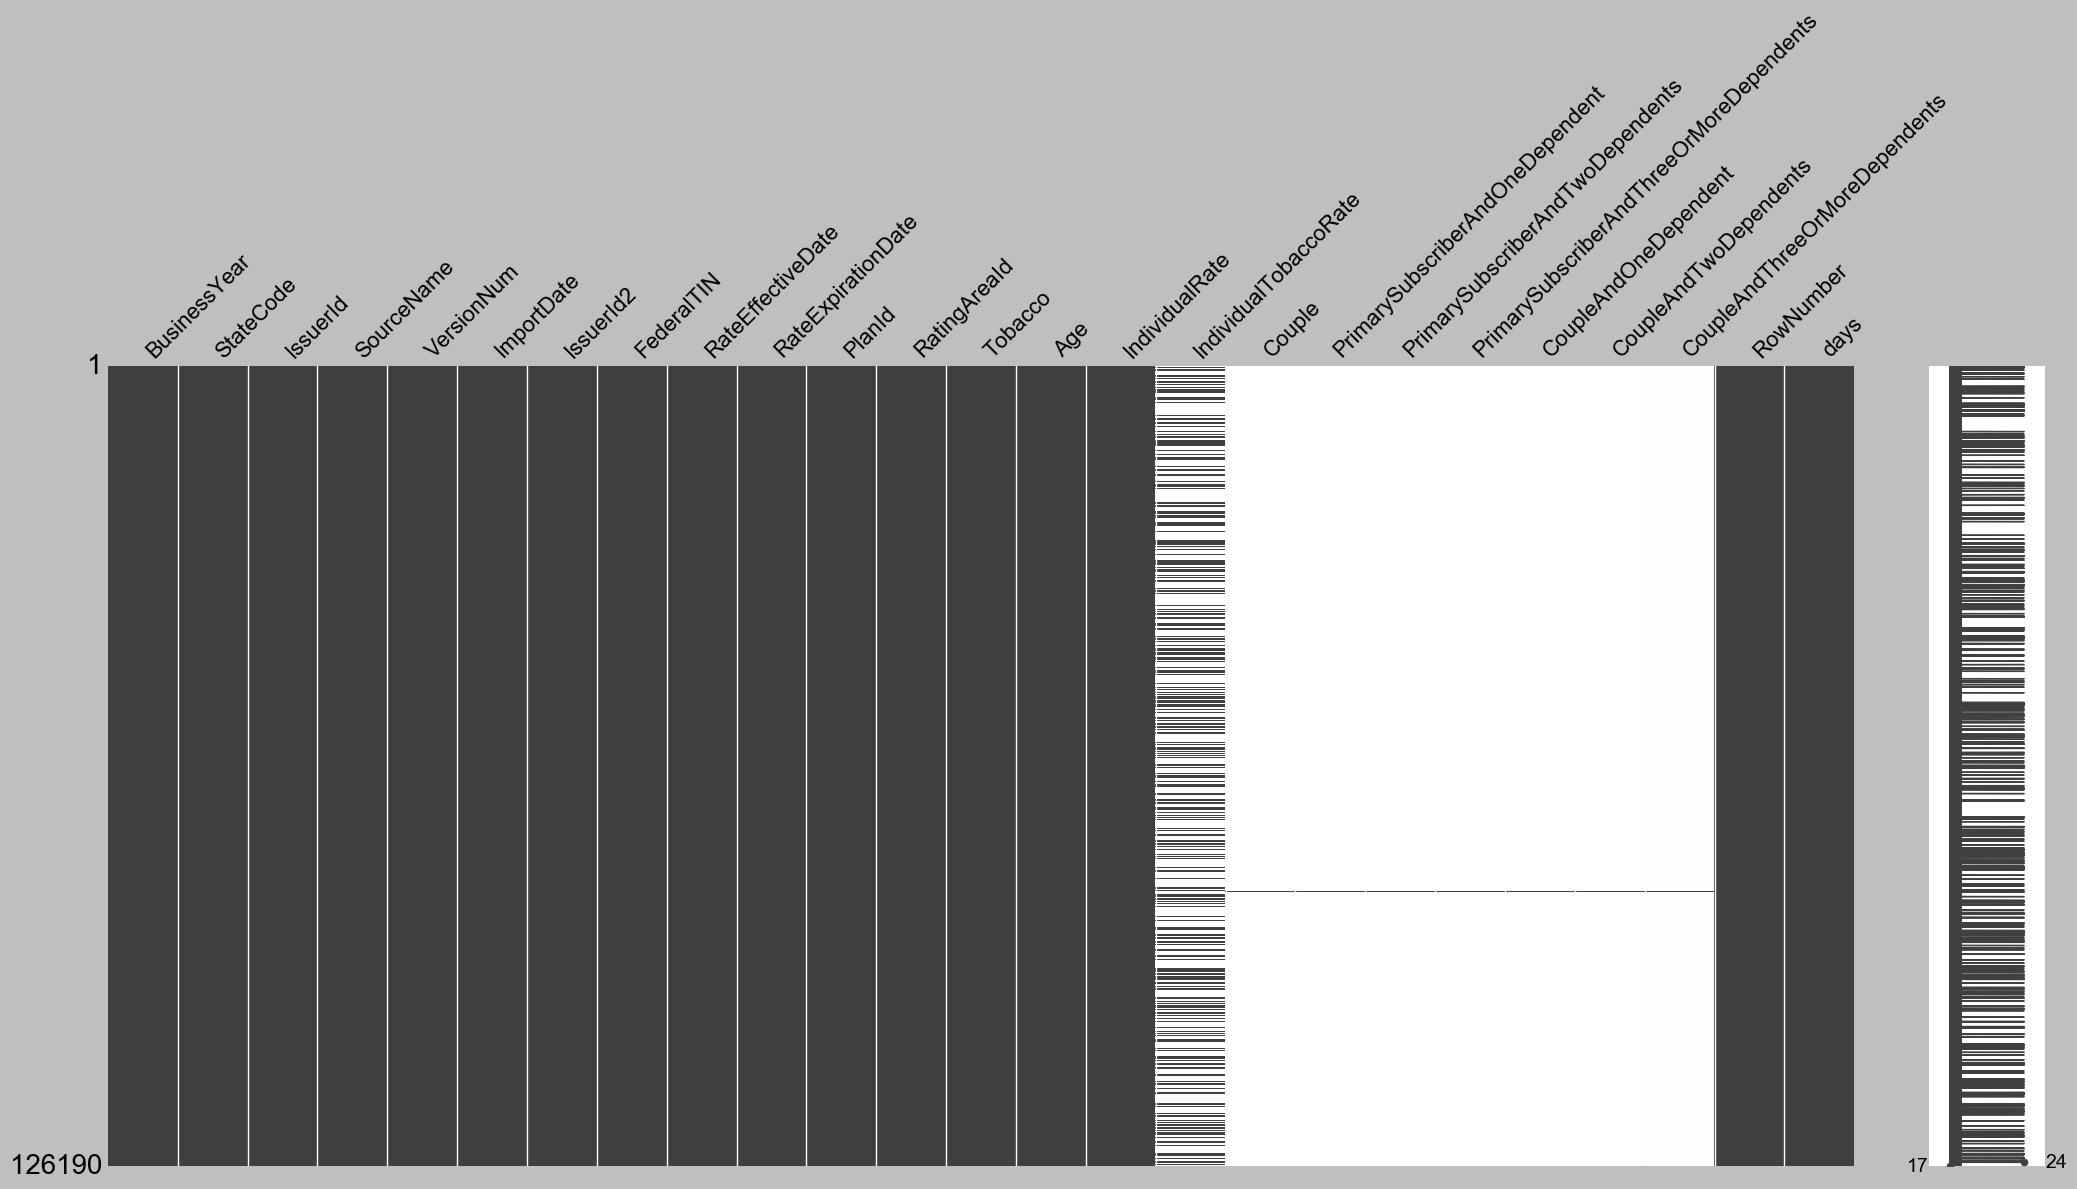

In [558]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df_05)
plt.savefig('nocleandataoriginal')

In [559]:

df_05["Couple_extra"] = 'Not_Applicable'
df_05["Couple_extra"][df_05["Couple"] <= 50] = "Below_50"
df_05["Couple_extra"][df_05["Couple"] > 50] = "Above_50"

df_05["PrimarySubscriberAndOneDependent_extra"] = 'Not_Applicable'
df_05["PrimarySubscriberAndOneDependent_extra"][df_05["PrimarySubscriberAndOneDependent"] <= 50] = "Below_50"
df_05["PrimarySubscriberAndOneDependent_extra"][df_05["PrimarySubscriberAndOneDependent"] > 50] = "Above_50"

df_05["PrimarySubscriberAndTwoDependents_extra"] = 'Not_Applicable'
df_05["PrimarySubscriberAndTwoDependents_extra"][df_05["PrimarySubscriberAndTwoDependents"] <= 70] = "Below_70"
df_05["PrimarySubscriberAndTwoDependents_extra"][df_05["PrimarySubscriberAndTwoDependents"] > 70] = "Above_70"

df_05["PrimarySubscriberAndThreeOrMoreDependents_extra"] = 'Not_Applicable'
df_05["PrimarySubscriberAndThreeOrMoreDependents_extra"][df_05["PrimarySubscriberAndThreeOrMoreDependents"] <= 90] = "Below_90"
df_05["PrimarySubscriberAndThreeOrMoreDependents_extra"][df_05["PrimarySubscriberAndThreeOrMoreDependents"] > 90] = "Above_90"

df_05["CoupleAndOneDependent_extra"] = 'Not_Applicable'
df_05["CoupleAndOneDependent_extra"][df_05["CoupleAndOneDependent"] <= 70] = "Below_70"
df_05["CoupleAndOneDependent_extra"][df_05["CoupleAndOneDependent"] > 70] = "Above_70"

df_05["CoupleAndTwoDependents_extra"] = 'Not_Applicable'
df_05["CoupleAndTwoDependents_extra"][df_05["CoupleAndTwoDependents"] <= 90] = "Below_90"
df_05["CoupleAndTwoDependents_extra"][df_05["CoupleAndTwoDependents"] > 90] = "Above_90"

df_05["CoupleAndThreeOrMoreDependents_extra"] = 'Not_Applicable'
df_05["CoupleAndThreeOrMoreDependents_extra"][df_05["CoupleAndThreeOrMoreDependents"] <= 110] = "Below_110"
df_05["CoupleAndThreeOrMoreDependents_extra"][df_05["CoupleAndThreeOrMoreDependents"] > 110] = "Above_110"

df_05["IndividualTobaccoRate_extra"] = 'Not_Applicable'
df_05["IndividualTobaccoRate_extra"][df_05["IndividualTobaccoRate"] <= 540] = "Below_540"
df_05["IndividualTobaccoRate_extra"][df_05["IndividualTobaccoRate"] > 540] = "Above_540"

#df_05["Age_extra"] = 'Age_65_over'
#df_05["Age_extra"][df_05["Age"] <=64] = "Age_61_64"
#df_05["Age_extra"][df_05["Age"] <= 60] = "Age_51_60"
#df_05["Age_extra"][df_05["Age"] <= 50] = "Age_41_50"
#df_05["Age_extra"][df_05["Age"] <= 40] = "Age_31_40"
#df_05["Age_extra"][df_05["Age"] <=30 ] = "Age_21_30"
#df_05["Age_extra"][df_05["Age"] == '0-20'] = "young_age"

#df_05["Age_extra"] = '0'
#df_05[ df_05.Age =='0-20' ]['Age_extra'] = 'young'
#df_05[ (df_05.Age<='30') & (df_05.Age>'20') ]['Age_extra'] = 'Age_21_30'
#df_05[ (df_05.Age<='40') & (df_05.Age>'30') ]['Age_extra'] = 'Age_31_40'
#df_05[ (df_05.Age<='50') & (df_05.Age>'40') ]['Age_extra'] = 'Age_41_50'
#df_05[ (df_05.Age<='60') & (df_05.Age>'50') ]['Age_extra'] = 'Age_51_60'
#df_05[ (df_05.Age<='64') & (df_05.Age>'60') ]['Age_extra'] = 'Age_61_64'
#df_05[ df_05.Age =='65 and over' ]['Age_extra'] = 'Age_65_over'


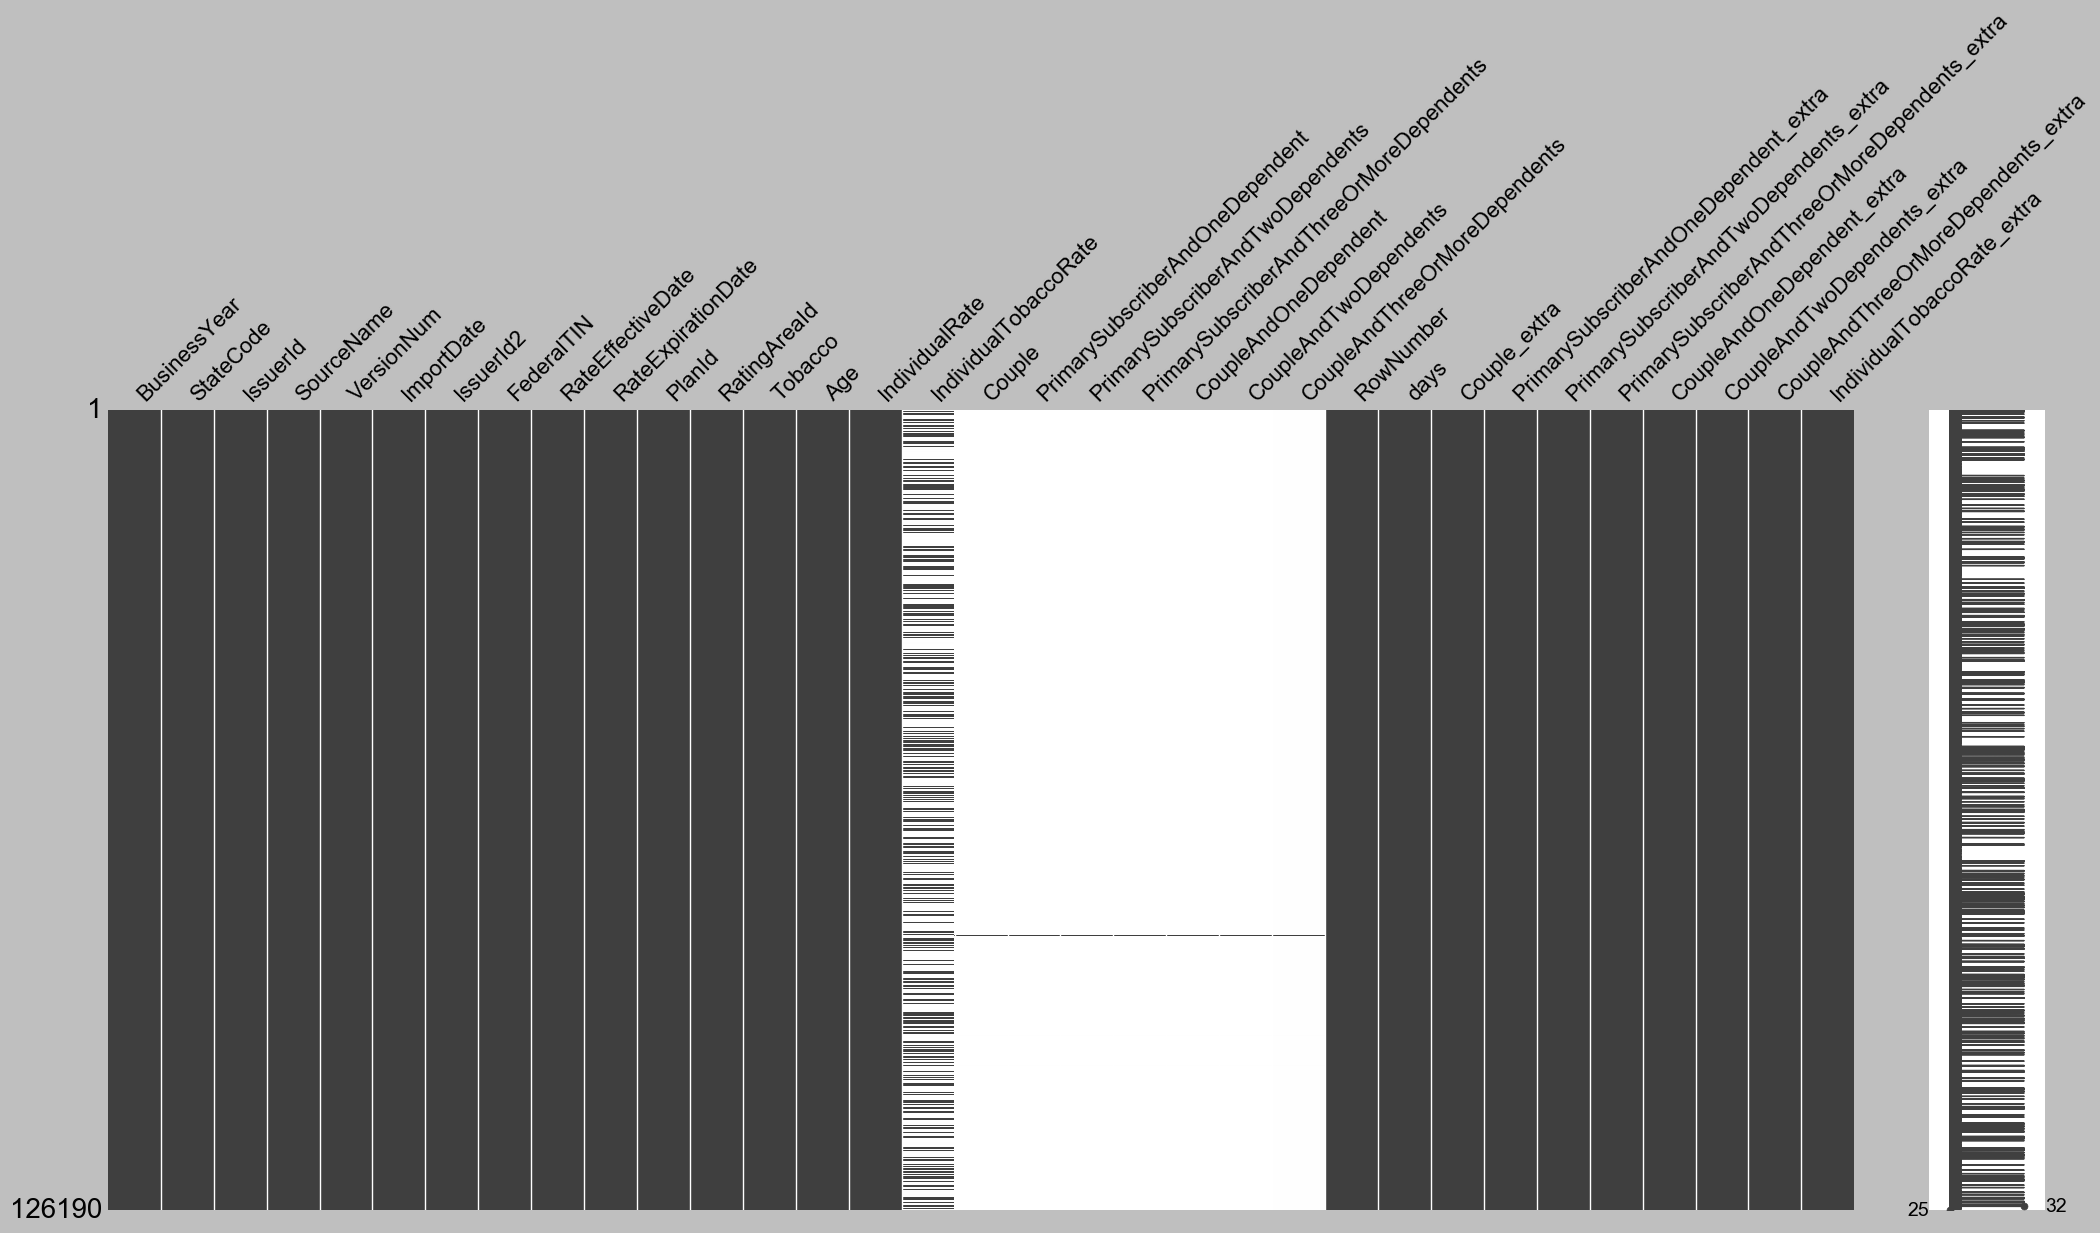

In [560]:
msno.matrix(df_05)

In [561]:
print df_05["Couple_extra"].describe()
print df_05["PrimarySubscriberAndOneDependent_extra"].describe()
print df_05["PrimarySubscriberAndTwoDependents_extra"].describe()
print df_05["PrimarySubscriberAndThreeOrMoreDependents_extra"].describe()
print df_05["CoupleAndOneDependent_extra"].describe()
print df_05["CoupleAndTwoDependents_extra"].describe()
print df_05["CoupleAndThreeOrMoreDependents_extra"].describe()
print df_05["IndividualTobaccoRate_extra"].describe()
#print df_05["Age_extra"].describe()

count             126190
unique                 3
top       Not_Applicable
freq              125795
Name: Couple_extra, dtype: object
count             126190
unique                 3
top       Not_Applicable
freq              125795
Name: PrimarySubscriberAndOneDependent_extra, dtype: object
count             126190
unique                 3
top       Not_Applicable
freq              125795
Name: PrimarySubscriberAndTwoDependents_extra, dtype: object
count             126190
unique                 3
top       Not_Applicable
freq              125795
Name: PrimarySubscriberAndThreeOrMoreDependents_extra, dtype: object
count             126190
unique                 3
top       Not_Applicable
freq              125795
Name: CoupleAndOneDependent_extra, dtype: object
count             126190
unique                 3
top       Not_Applicable
freq              125795
Name: CoupleAndTwoDependents_extra, dtype: object
count             126190
unique                 3
top       Not_Applicable
fr

In [562]:
df_05["IndividualRate"].describe()

count    126190.000000
mean        315.798770
std         296.985499
min           0.000000
25%          29.110000
50%         290.410000
75%         474.615000
max        1978.540000
Name: IndividualRate, dtype: float64

In [563]:
import copy
df_05_copy=copy.deepcopy(df_05)

In [564]:
df_05_copy.columns

Index([u'BusinessYear', u'StateCode', u'IssuerId', u'SourceName',
       u'VersionNum', u'ImportDate', u'IssuerId2', u'FederalTIN',
       u'RateEffectiveDate', u'RateExpirationDate', u'PlanId', u'RatingAreaId',
       u'Tobacco', u'Age', u'IndividualRate', u'IndividualTobaccoRate',
       u'Couple', u'PrimarySubscriberAndOneDependent',
       u'PrimarySubscriberAndTwoDependents',
       u'PrimarySubscriberAndThreeOrMoreDependents', u'CoupleAndOneDependent',
       u'CoupleAndTwoDependents', u'CoupleAndThreeOrMoreDependents',
       u'RowNumber', u'days', u'Couple_extra',
       u'PrimarySubscriberAndOneDependent_extra',
       u'PrimarySubscriberAndTwoDependents_extra',
       u'PrimarySubscriberAndThreeOrMoreDependents_extra',
       u'CoupleAndOneDependent_extra', u'CoupleAndTwoDependents_extra',
       u'CoupleAndThreeOrMoreDependents_extra',
       u'IndividualTobaccoRate_extra'],
      dtype='object')

In [565]:
df_05_copy.shape

(126190, 33)

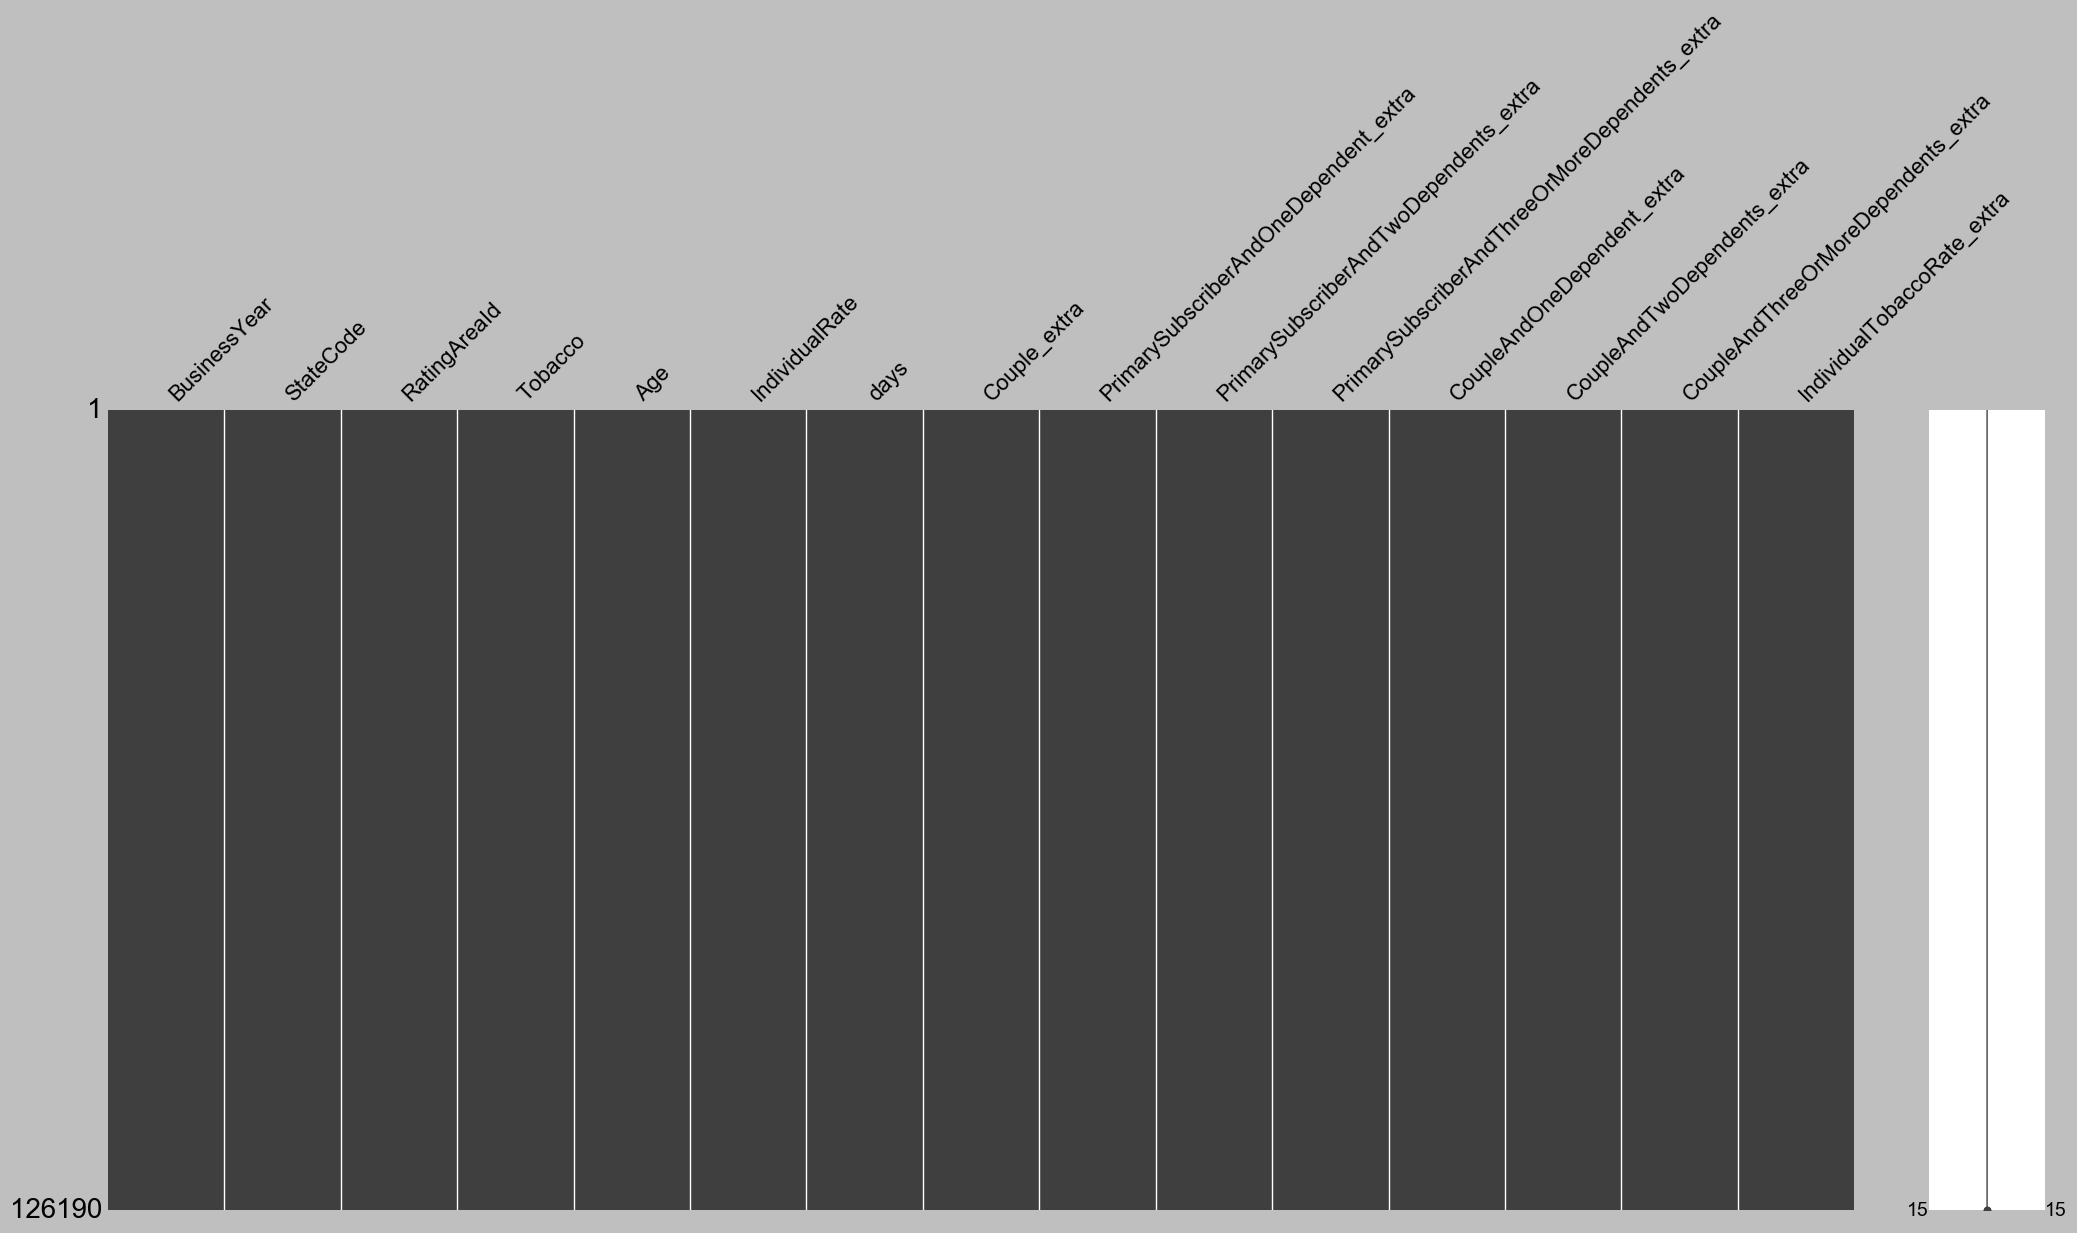

In [566]:
data_df=df_05_copy.drop([ u'IssuerId', u'SourceName',
       u'VersionNum', u'ImportDate', u'IssuerId2', u'FederalTIN',
       u'RateEffectiveDate', u'RateExpirationDate', u'PlanId',
       u'Couple', u'PrimarySubscriberAndOneDependent',u'IndividualTobaccoRate',
       u'PrimarySubscriberAndTwoDependents',
       u'PrimarySubscriberAndThreeOrMoreDependents', u'CoupleAndOneDependent',
       u'CoupleAndTwoDependents', u'CoupleAndThreeOrMoreDependents',
       u'RowNumber'], axis=1)
msno.matrix(data_df)

In [567]:
data_df.to_csv('data_rate_clean.csv', encoding='utf-8')

## modeling section

### BusinessYear

In [568]:
data_df.columns

Index([u'BusinessYear', u'StateCode', u'RatingAreaId', u'Tobacco', u'Age',
       u'IndividualRate', u'days', u'Couple_extra',
       u'PrimarySubscriberAndOneDependent_extra',
       u'PrimarySubscriberAndTwoDependents_extra',
       u'PrimarySubscriberAndThreeOrMoreDependents_extra',
       u'CoupleAndOneDependent_extra', u'CoupleAndTwoDependents_extra',
       u'CoupleAndThreeOrMoreDependents_extra',
       u'IndividualTobaccoRate_extra'],
      dtype='object')

In [569]:
df_dummies_BusinessYear  = pd.get_dummies(data_df['BusinessYear'])

In [570]:
df_dummies_BusinessYear.columns=['year_2014', 'year_2015', 'year_2016']

In [571]:
df_dummies_BusinessYear.drop(['year_2014'], axis=1, inplace=True)

In [572]:
data_df =data_df.join(df_dummies_BusinessYear)

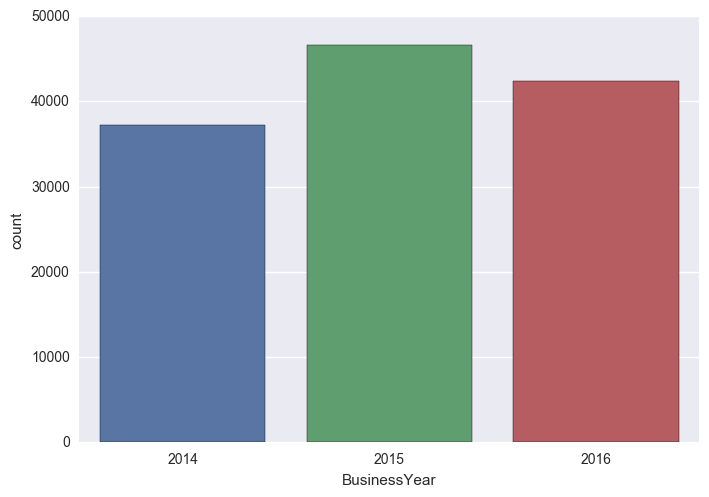

In [573]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(font_scale=1)
sns.countplot(x='BusinessYear', data=data_df)
plt.savefig('rateindi-year-count')

In [574]:
### StateCode

In [575]:
df_dummies_StateCode  = pd.get_dummies(data_df['StateCode'])

In [576]:
df_dummies_StateCode.columns=[u'state_AK', u'state_AL', u'state_AR', u'state_AZ', u'state_DE', u'state_FL', u'state_GA', u'state_HI', u'state_IA', u'state_ID',
       u'state_IL', u'state_IN', u'state_KS', u'state_LA', u'state_ME', u'state_MI', u'state_MO', u'state_MS', u'state_MT', u'state_NC',
       u'state_ND', u'state_NE', u'state_NH', u'state_NJ', u'state_NM', u'state_NV', u'state_OH', u'state_OK', u'state_OR', u'state_PA',
       u'state_SC', u'state_SD', u'state_TN', u'state_TX', u'state_UT', u'state_VA', u'state_WI', u'state_WV', u'state_WY']

In [577]:
df_dummies_StateCode.drop(['state_AK'], axis=1, inplace=True)

In [578]:
data_df =data_df.join(df_dummies_StateCode)

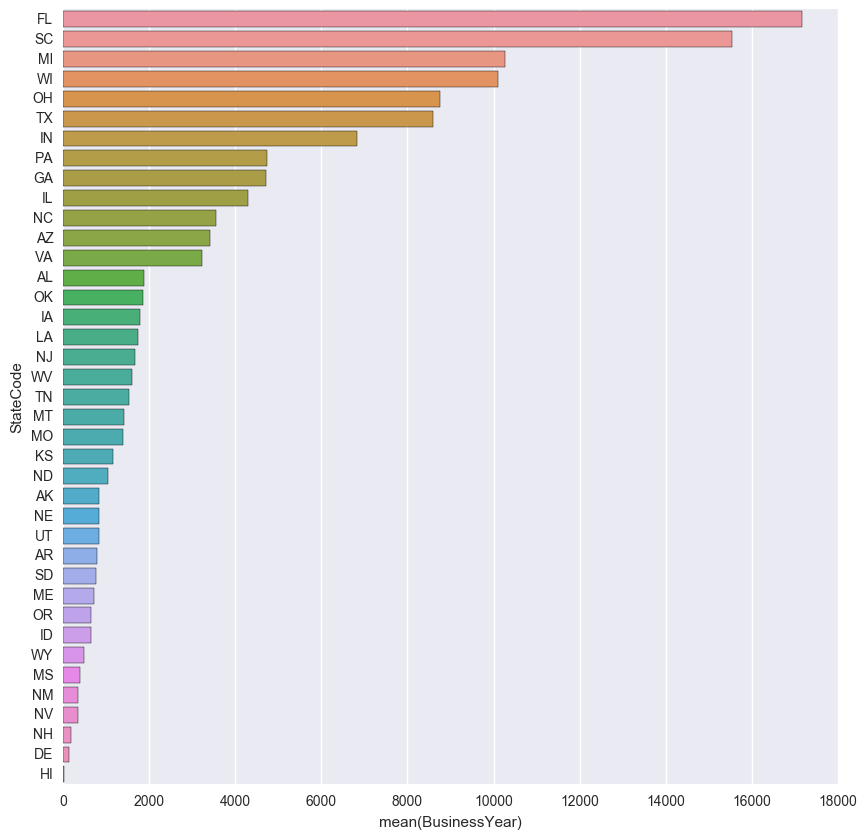

In [579]:
fig, ax = plt.subplots(figsize=(10,10))
df_plot = data_df.groupby('StateCode').count().reset_index().sort_values('BusinessYear', ascending=False)
sns.barplot(x='BusinessYear', y='StateCode', data=df_plot)
plt.savefig('rateindi-state-count')

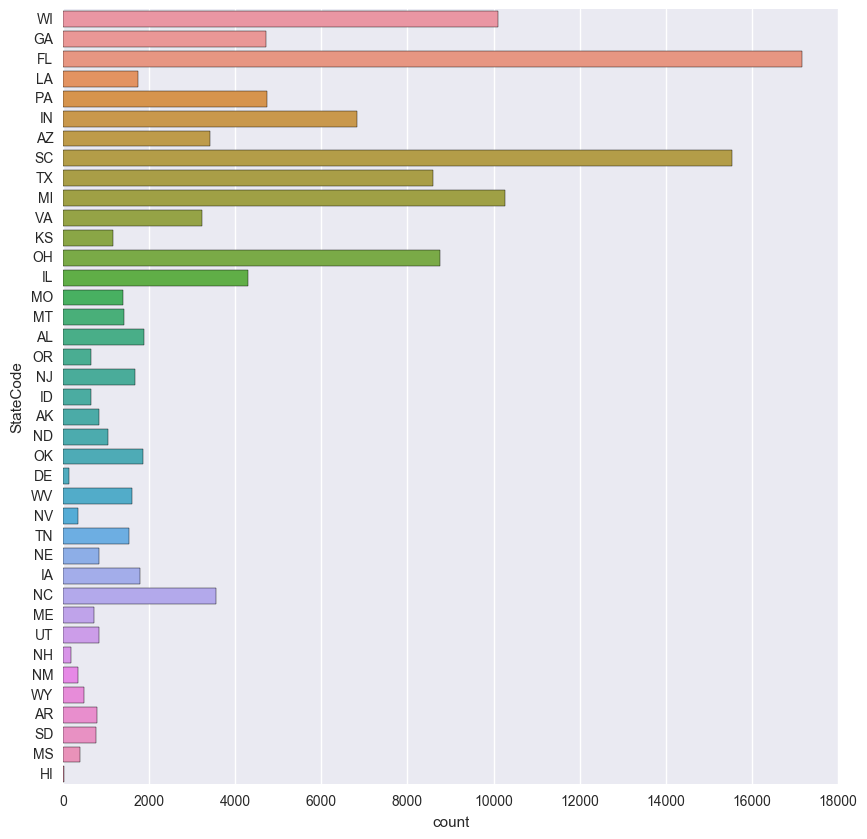

In [580]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y='StateCode', data=data_df)

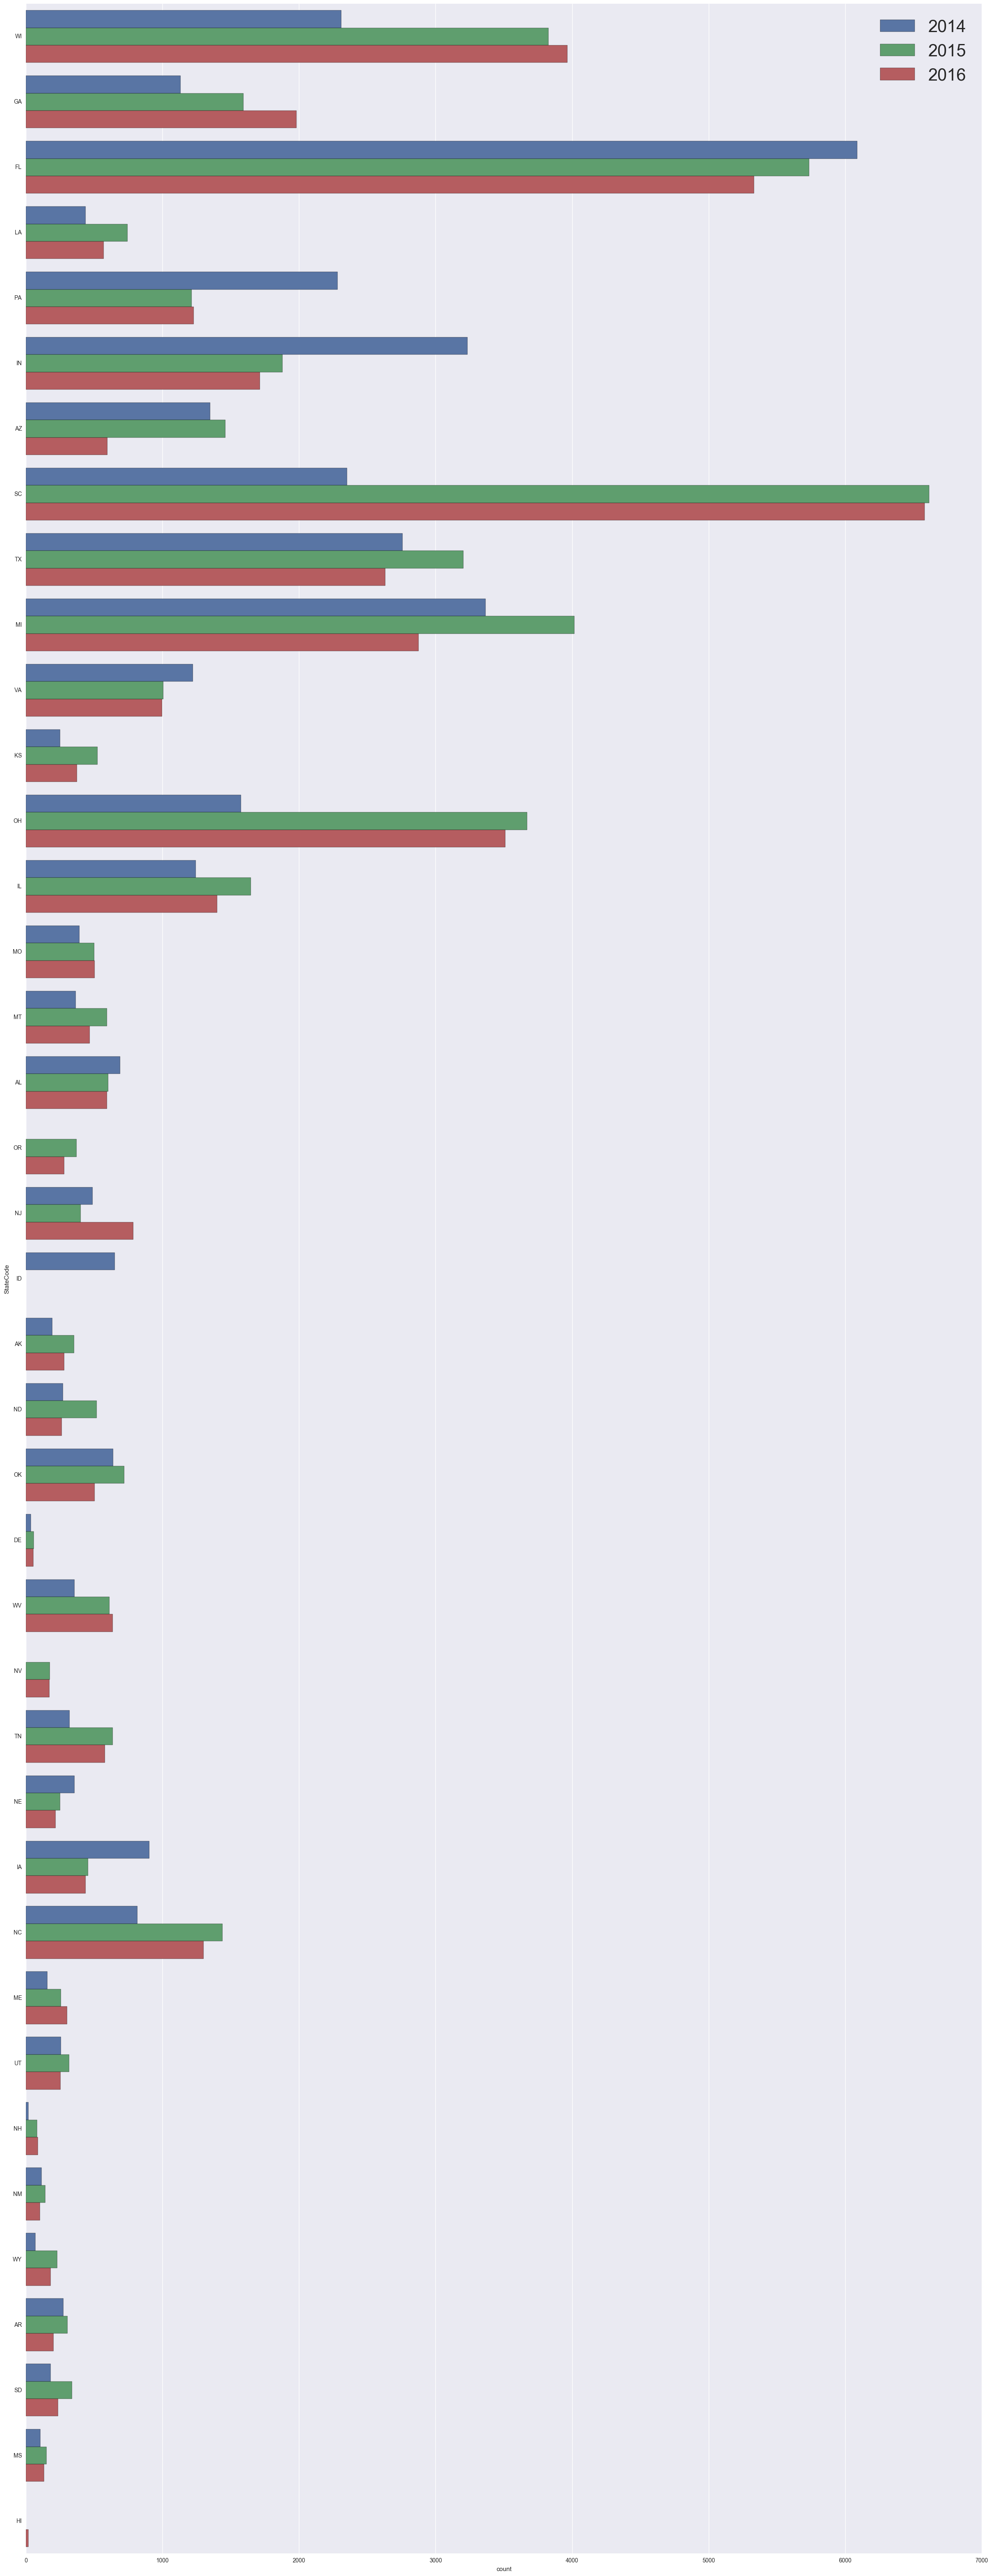

In [581]:
fig, ax = plt.subplots(figsize=(30,80))
sns.set(font_scale=3)
ax = sns.countplot(y="StateCode", hue="BusinessYear", data=data_df)
ax.legend(prop={'size':30})
plt.savefig('rateindi-year-state-count')

In [582]:
## Tobacco

In [583]:
df_dummies_Tobacco  = pd.get_dummies(data_df['Tobacco'])

In [584]:
df_dummies_Tobacco.columns =[u'No_Preference', u'Tobacco_User/Non_Tobacco_User']

In [585]:
df_dummies_Tobacco.drop(['No_Preference'], axis=1, inplace=True)


In [586]:
data_df =data_df.join(df_dummies_Tobacco)

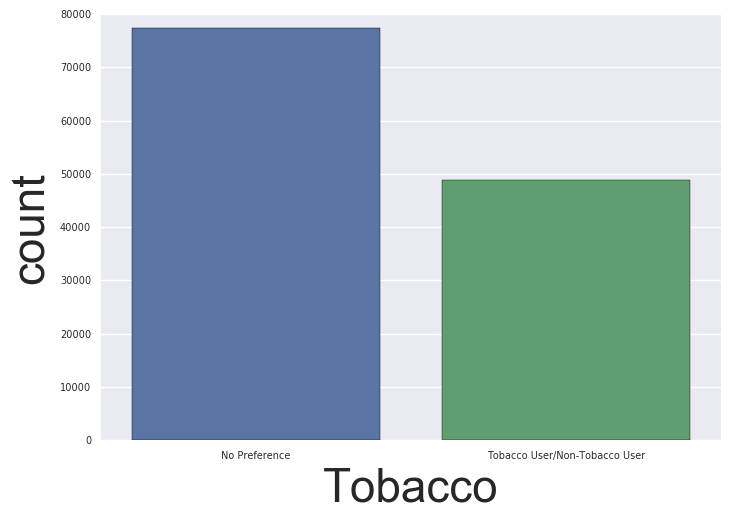

In [587]:
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7)
sns.countplot(x='Tobacco', data=data_df)
plt.savefig('rateindi-tobacco-count')

In [588]:
##Age

In [589]:
df_dummies_Age  = pd.get_dummies(data_df['Age'])

In [590]:
df_dummies_Age.columns=[u'Age_0-20', u'Age_21', u'Age_22', u'Age_23', u'Age_24', u'Age_25', u'Age_26', u'Age_27', u'Age_28', u'Age_29',
       u'Age_30', u'Age_31', u'Age_32', u'Age_33', u'Age_34', u'Age_35', u'Age_36', u'Age_37', u'Age_38', u'Age_39',
       u'Age_0', u'Age_41', u'Age_42', u'Age_43', u'Age_44', u'Age_45', u'Age_46', u'Age_47', u'Age_48', u'Age_49',
       u'Age_50', u'Age_51', u'Age_52', u'Age_53', u'Age_54', u'Age_55', u'Age_56', u'Age_57', u'Age_58', u'Age_59',
       u'Age_60', u'Age_61', u'Age_62', u'Age_63', u'Age_64', u'Age_65 and over', u'Family Option']

In [591]:
df_dummies_Age.drop([u'Age_0-20'], axis=1, inplace=True)

In [592]:
data_df =data_df.join(df_dummies_Age)

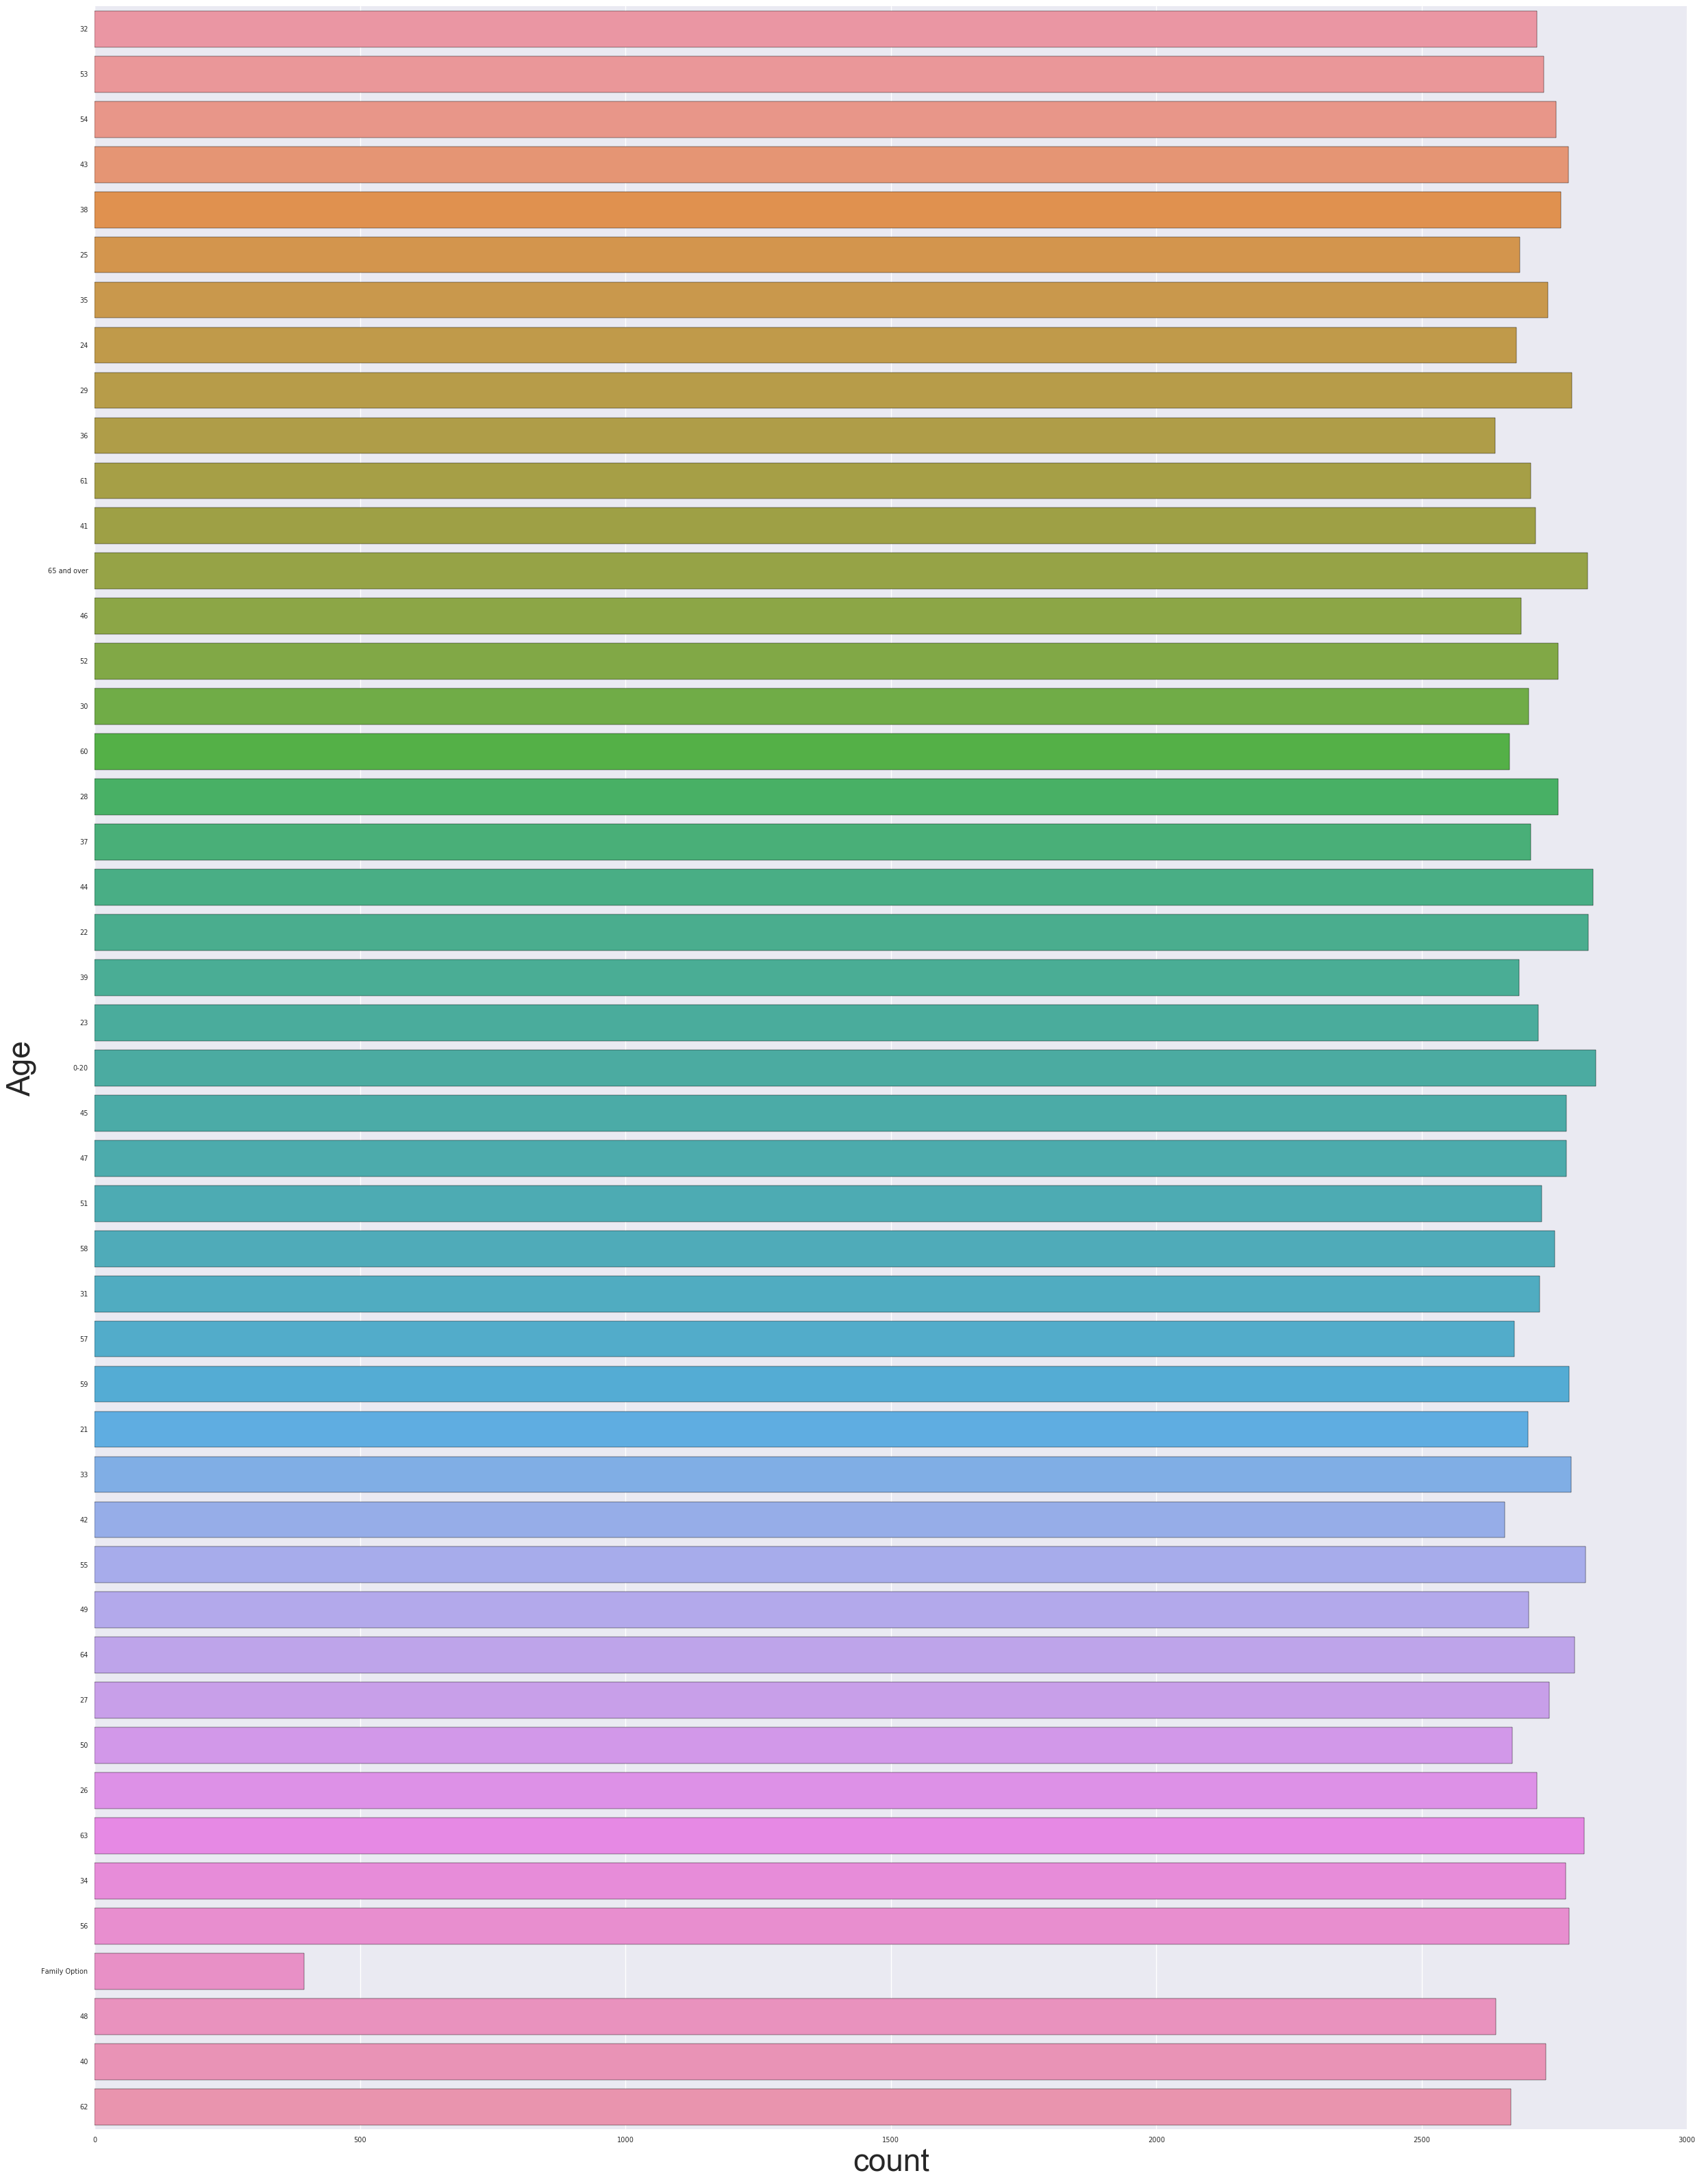

In [593]:
fig, ax = plt.subplots(figsize=(30,40))
sns.set(font_scale=1.25)
sns.countplot(y='Age', data=data_df)
plt.rc('xtick', labelsize=50) 
plt.rc('ytick', labelsize=50)
plt.savefig('rateindi-age-count')

In [594]:
## ratingArea

In [595]:
df_dummies_area  = pd.get_dummies(data_df['RatingAreaId'])

In [596]:
df_dummies_area.columns=[u'Rating_Area_1', u'Rating_Area_10', u'Rating_Area_11',
       u'Rating_Area_12', u'Rating_Area_13', u'Rating_Area_14',
       u'Rating_Area_15', u'Rating_Area_16', u'Rating_Area_17',
       u'Rating_Area_18', u'Rating_Area_19', u'Rating_Area_2',
       u'Rating_Area_20', u'Rating_Area_21', u'Rating_Area_22',
       u'Rating_Area_23', u'Rating_Area_24', u'Rating_Area_25',
       u'Rating_Area_26', u'Rating_Area_27', u'Rating_Area_28',
       u'Rating_Area_29', u'Rating_Area_3', u'Rating_Area_30',
       u'Rating_Area_31', u'Rating_Area_32', u'Rating_Area_33',
       u'Rating_Area_34', u'Rating_Area_35', u'Rating_Area_36',
       u'Rating_Area_37', u'Rating_Area_38', u'Rating_Area_39',
       u'Rating_Area_4', u'Rating_Area_40', u'Rating_Area_41',
       u'Rating_Area_42', u'Rating_Area_43', u'Rating_Area_44',
       u'Rating_Area_45', u'Rating_Area_46', u'Rating_Area_47',
       u'Rating_Area_48', u'Rating_Area_49', u'Rating_Area_5',
       u'Rating_Area_50', u'Rating_Area_51', u'Rating_Area_52',
       u'Rating_Area_53', u'Rating_Area_54', u'Rating_Area_55',
       u'Rating_Area_56', u'Rating_Area_57', u'Rating_Area_58',
       u'Rating_Area_59', u'Rating_Area_6', u'Rating_Area_60',
       u'Rating_Area_61', u'Rating_Area_62', u'Rating_Area_63',
       u'Rating_Area_64', u'Rating_Area_65', u'Rating_Area_ 66',
       u'Rating_Area_67', u'Rating_Area_7', u'Rating_Area_ 8',
       u'Rating_Area_9']

In [597]:
df_dummies_area.drop([u'Rating_Area_9'], axis=1, inplace=True)

In [598]:
data_df =data_df.join(df_dummies_area)

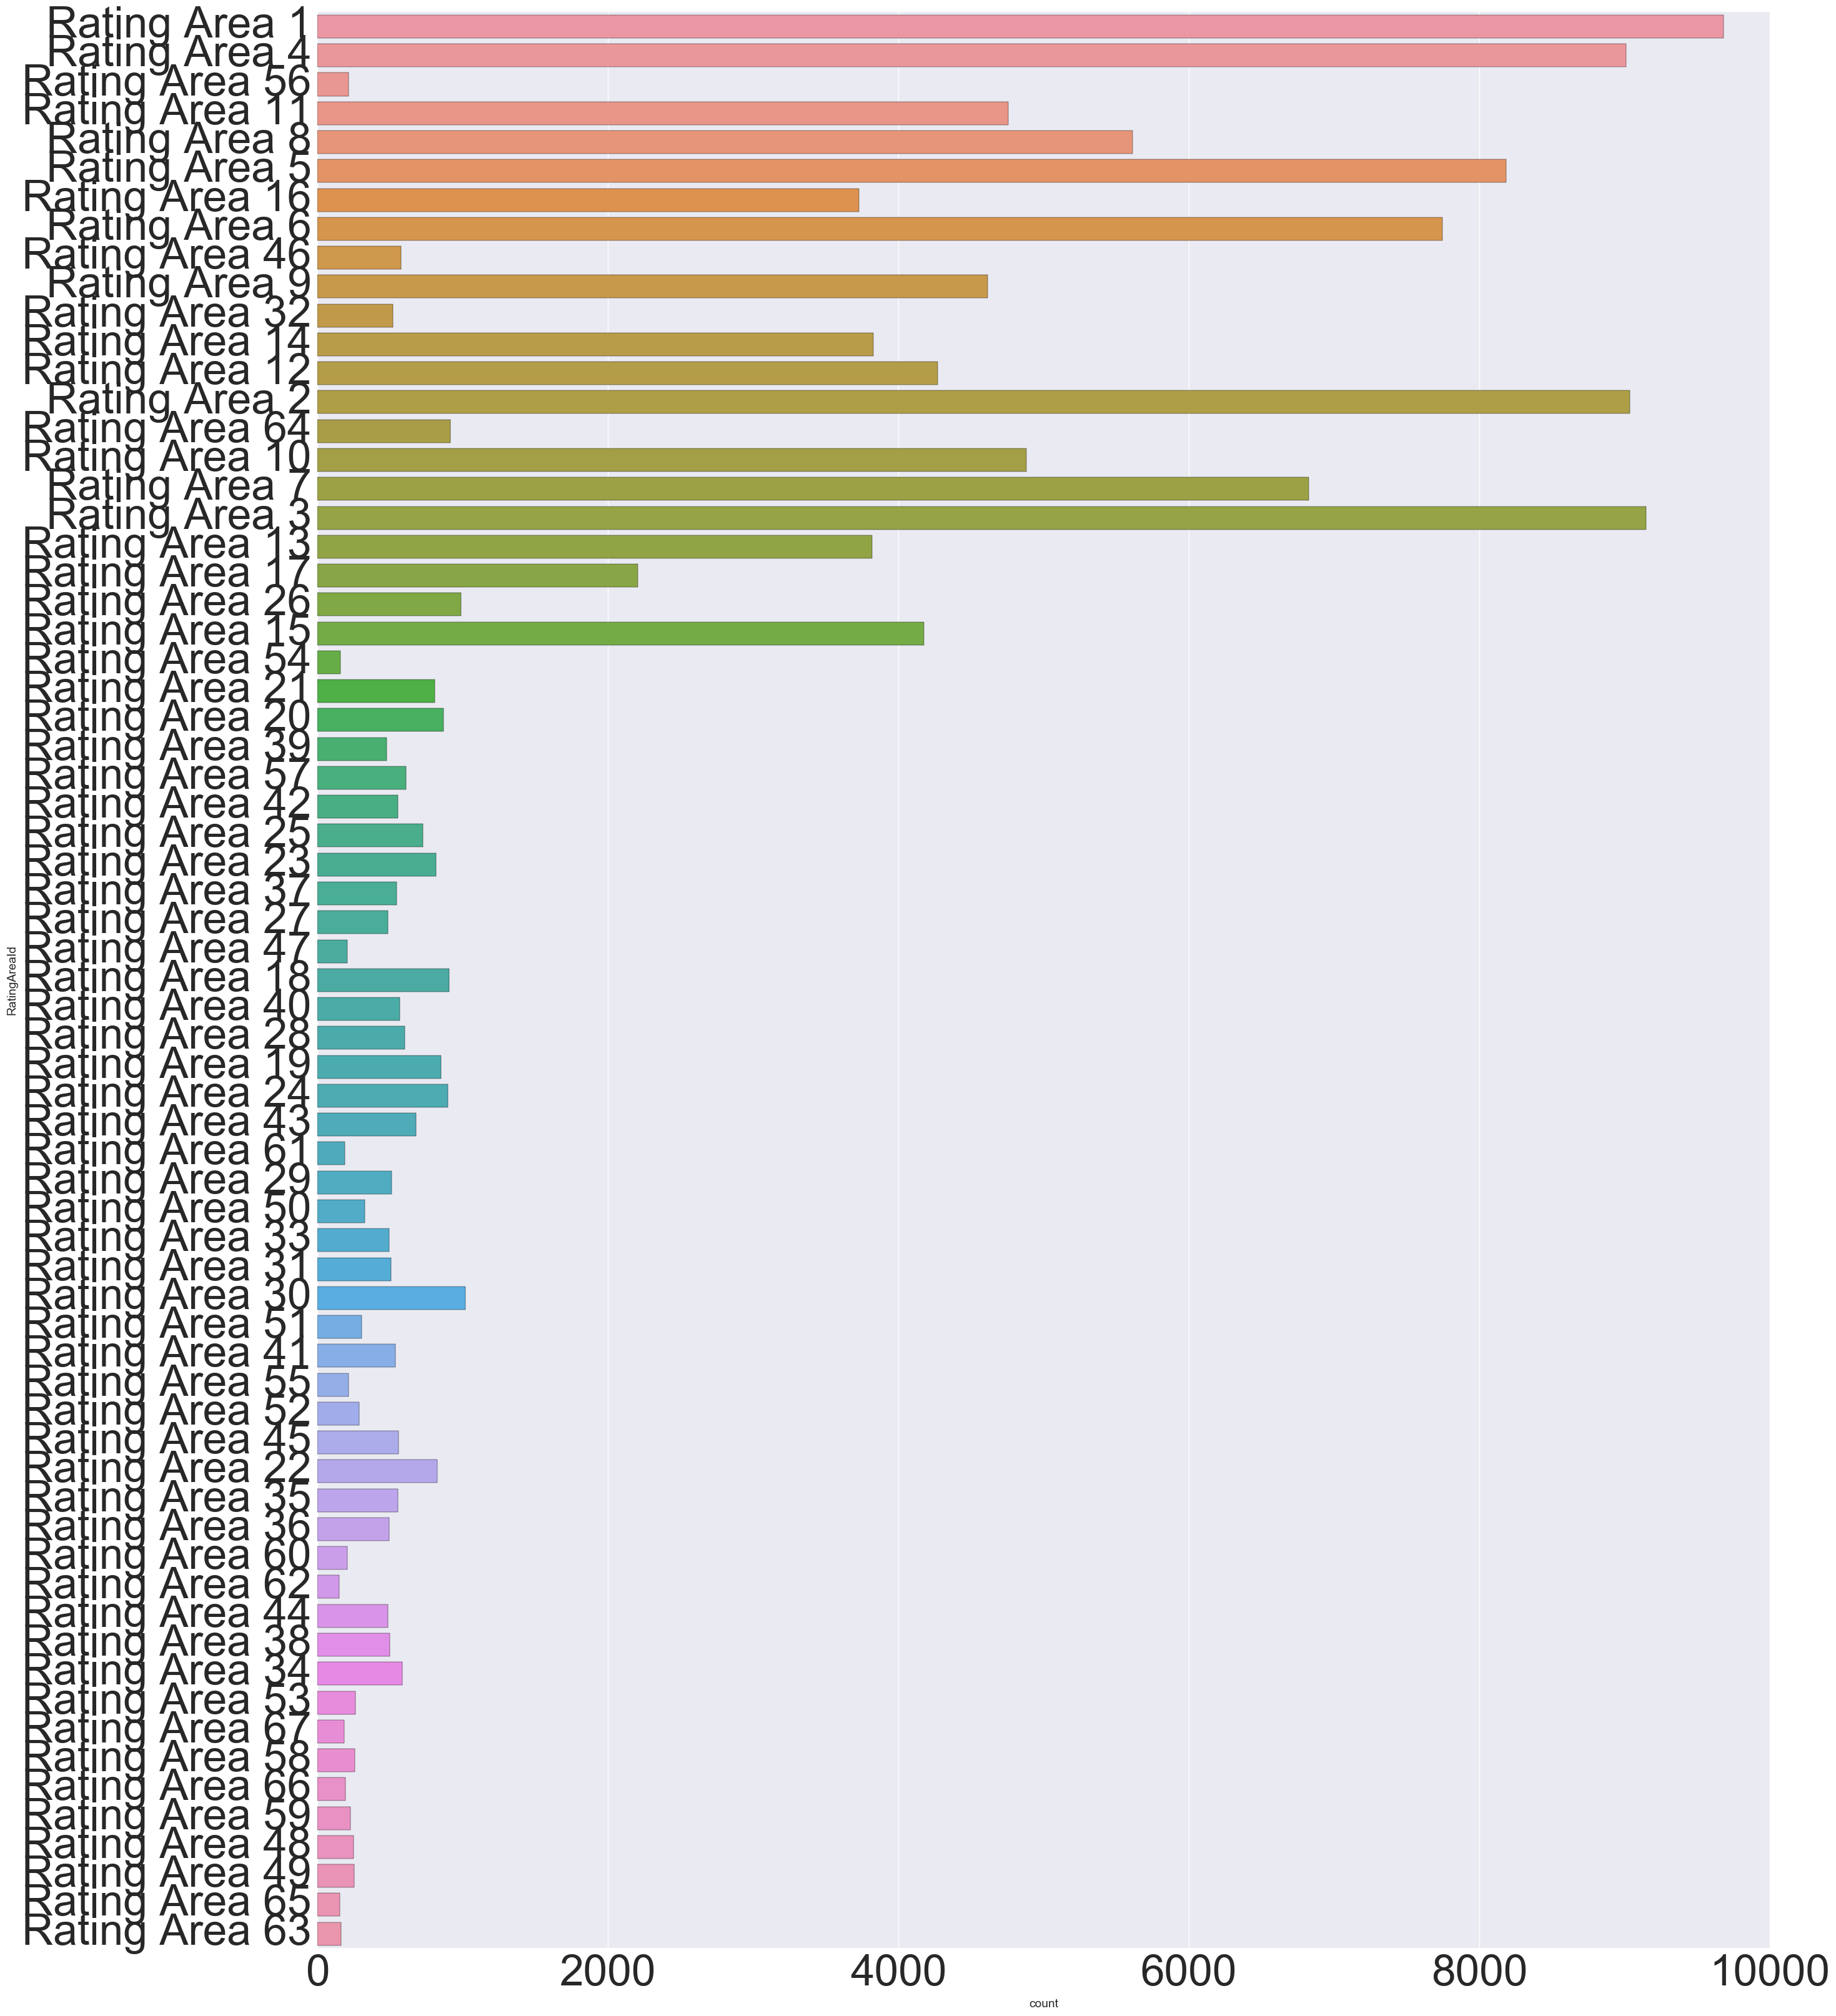

In [599]:
fig, ax = plt.subplots(figsize=(30,40))
sns.set(font_scale=3)
sns.countplot(y='RatingAreaId', data=data_df)
plt.savefig('rateindi-areacode-count')

In [603]:
## day
df_dummies_day  = pd.get_dummies(data_df['days'])

In [604]:
df_dummies_day.columns

Index([u'122 days', u'180 days', u'181 days', u'183 days', u'33236 days',
       u'336 days', u'337 days', u'346 days', u'364 days', u'365 days',
       u'366 days', u'423 days', u'425 days', u'426 days', u'517 days',
       u'698 days', u'89 days', u'90 days', u'91 days'],
      dtype='object')

In [606]:
df_dummies_day.columns=[u'122 days', u'180 days', u'181 days', u'183 days', u'33236 days',
       u'336 days', u'337 days', u'346 days', u'364 days', u'365 days',
       u'366 days', u'423 days', u'425 days', u'426 days', u'517 days',
       u'698 days', u'89 days', u'90 days', u'91 days']

In [608]:
df_dummies_day.drop(['89 days'], axis=1, inplace=True)

In [609]:
data_df =data_df.join(df_dummies_day)

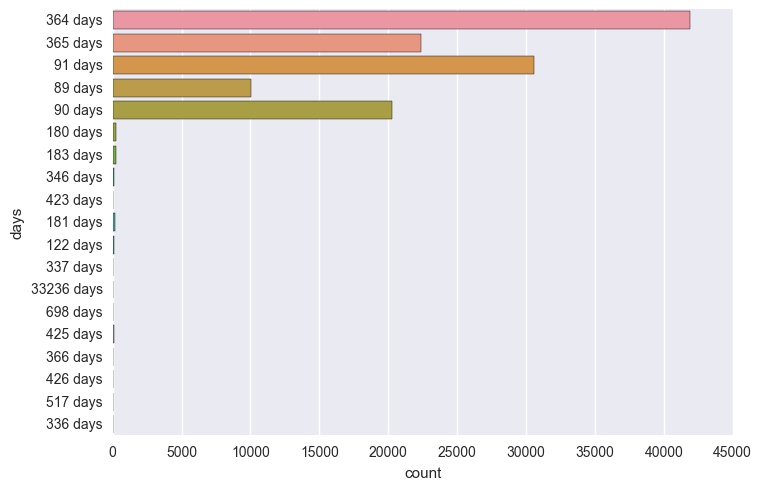

In [610]:
sns.set(font_scale=1)
sns.countplot(y='days', data=data_df)
plt.savefig('rateindi-duration-count')

In [611]:
data_df.shape

(126190, 186)

In [612]:
df_copy=copy.deepcopy(data_df)

In [613]:
df_copy.drop([u'BusinessYear', u'StateCode',
                                  u'RatingAreaId',
                                       u'Tobacco',
                                           u'Age',
                                u'IndividualRate',
                                          u'days',
                                  u'Couple_extra',
        u'PrimarySubscriberAndOneDependent_extra',
       u'PrimarySubscriberAndTwoDependents_extra',u'PrimarySubscriberAndThreeOrMoreDependents_extra',
                           u'CoupleAndOneDependent_extra',
                          u'CoupleAndTwoDependents_extra',
                  u'CoupleAndThreeOrMoreDependents_extra',
                           u'IndividualTobaccoRate_extra'], axis=1, inplace=True )

In [614]:
df_copy.shape

(126190, 171)

In [615]:
df_copy.dtypes

year_2015          float64
year_2016          float64
state_AL           float64
state_AR           float64
state_AZ           float64
state_DE           float64
state_FL           float64
state_GA           float64
state_HI           float64
state_IA           float64
state_ID           float64
state_IL           float64
state_IN           float64
state_KS           float64
state_LA           float64
state_ME           float64
state_MI           float64
state_MO           float64
state_MS           float64
state_MT           float64
state_NC           float64
state_ND           float64
state_NE           float64
state_NH           float64
state_NJ           float64
state_NM           float64
state_NV           float64
state_OH           float64
state_OK           float64
state_OR           float64
                    ...   
Rating_Area_59     float64
Rating_Area_6      float64
Rating_Area_60     float64
Rating_Area_61     float64
Rating_Area_62     float64
Rating_Area_63     float64
R

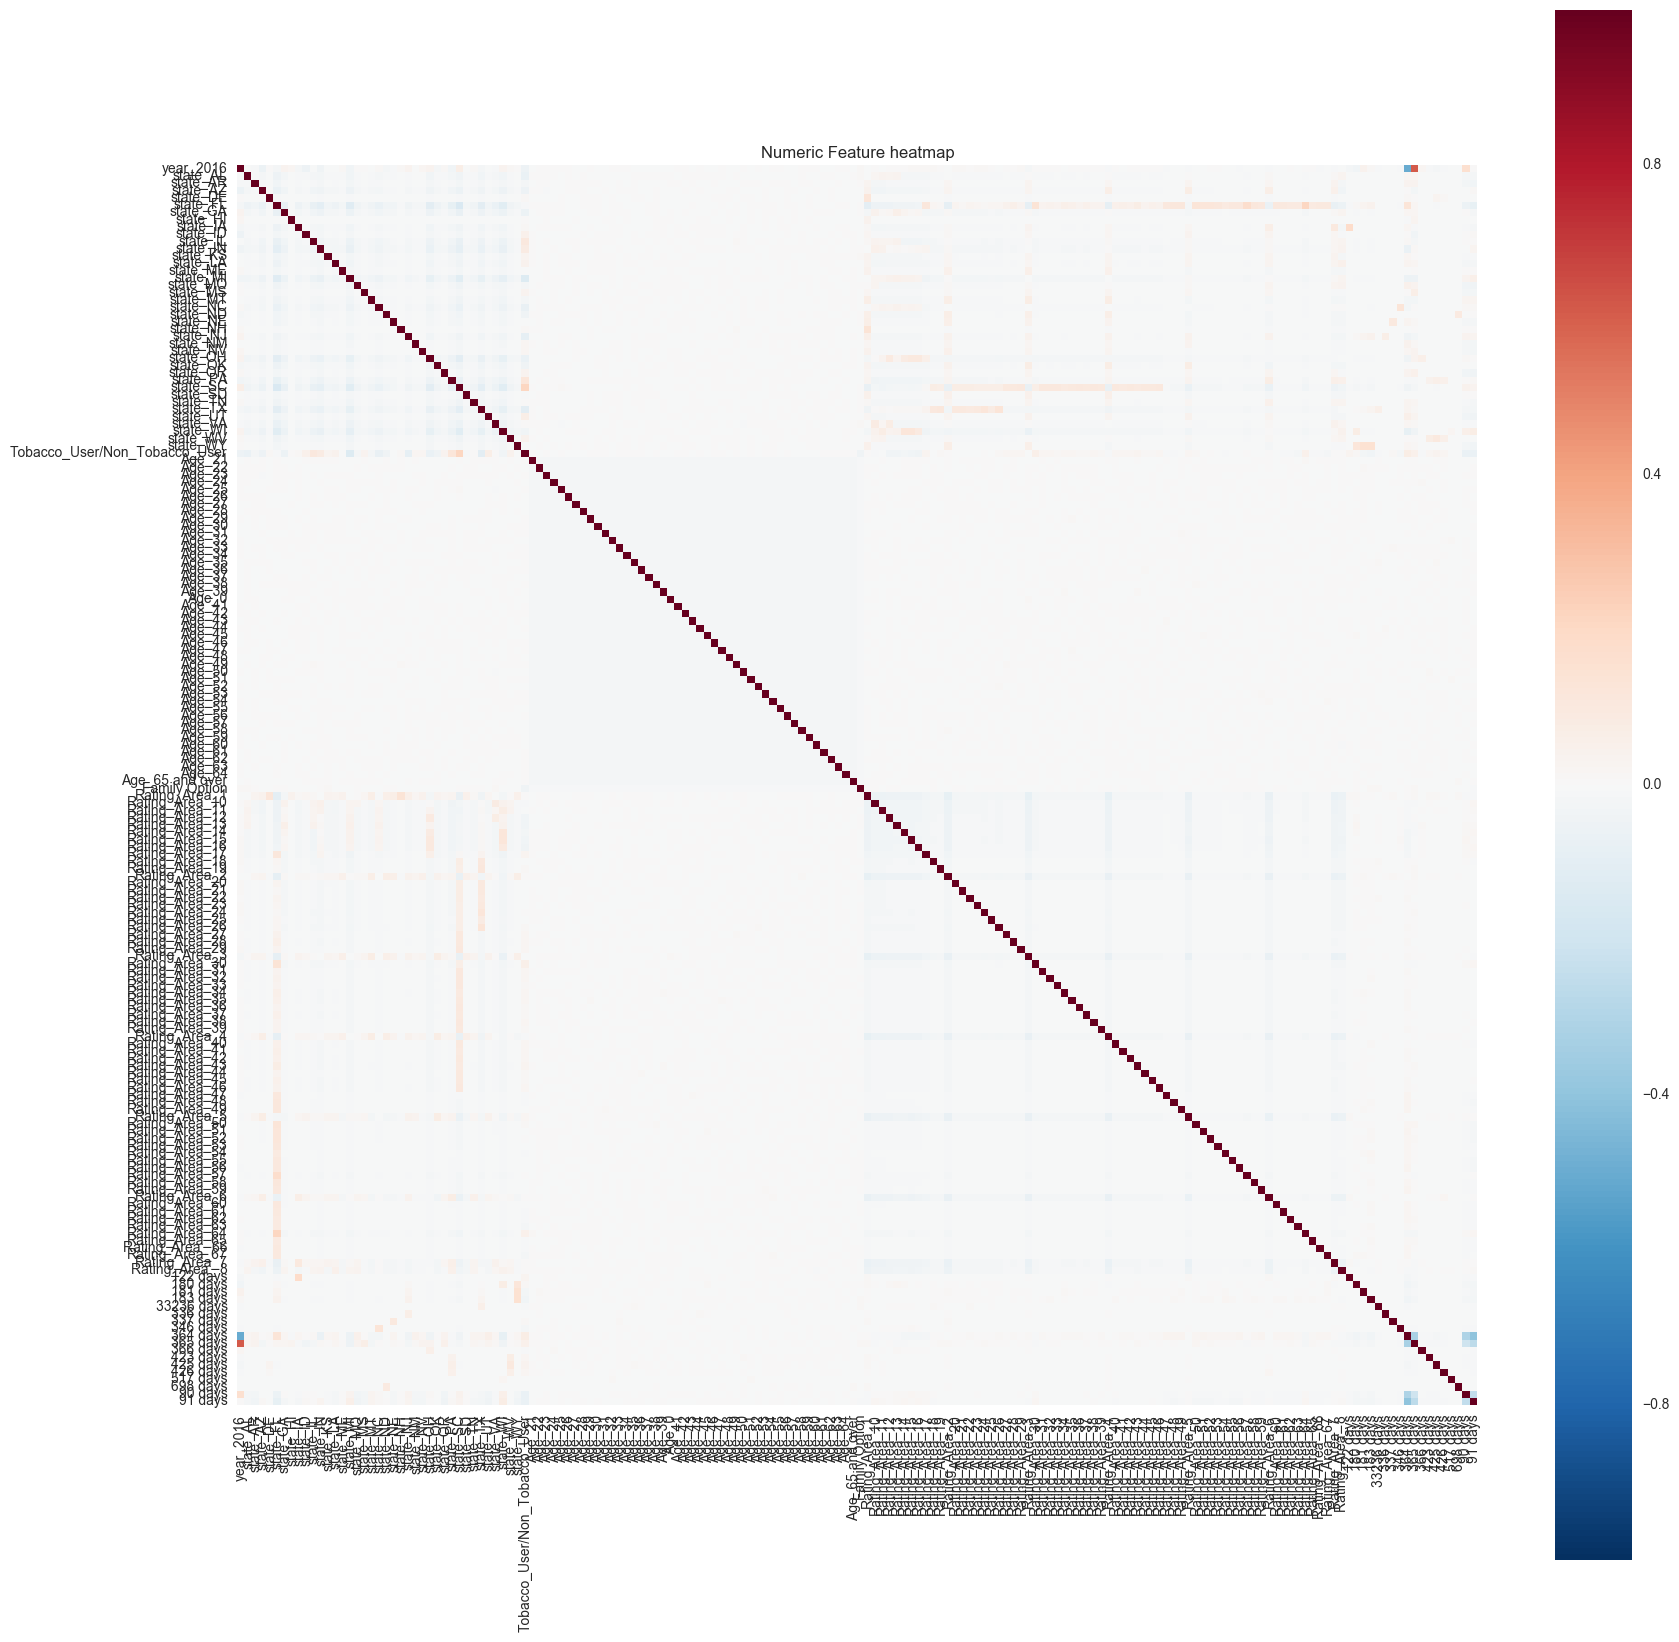

In [616]:
fig,ax = plt.subplots(figsize=(20,20))
correlation = df_copy.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')
plt.savefig('rateindi-heatmap-count')

In [617]:
from sklearn.cross_validation import train_test_split
X = df_copy
y= data_df.IndividualRate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(100952, 171) (100952,)
(25238, 171) (25238,)


In [619]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error


In [171]:
clf=Ridge(alpha=100)
clf.fit(X_train,y_train)
Y_predict=clf.predict(X_test)
print pd.Series(clf.coef_,index=X.columns)
mean_squared_error(y_test,Y_predict)

year_2015           -2.753612
year_2016           13.228636
state_AL           -30.031180
state_AR           -42.228715
state_AZ             2.000375
state_DE           -46.819088
state_FL           -77.248510
state_GA           -35.417458
state_HI           -13.175281
state_IA           -57.527652
state_ID          -151.919242
state_IL           -79.765789
state_IN          -105.463732
state_KS          -134.857225
state_LA           -30.279099
state_ME           -25.640287
state_MI          -121.252011
state_MO           -91.427165
state_MS           -41.842557
state_MT          -123.278755
state_NC           -45.323255
state_ND            -4.759550
state_NE           -65.122826
state_NH           -32.638674
state_NJ            83.807148
state_NM           -37.545656
state_NV           -29.147920
state_OH           -70.580682
state_OK            10.177702
state_OR           -56.829435
                      ...    
Rating_Area_6       -0.615289
Rating_Area_60       4.169130
Rating_Are

44303.652830224652

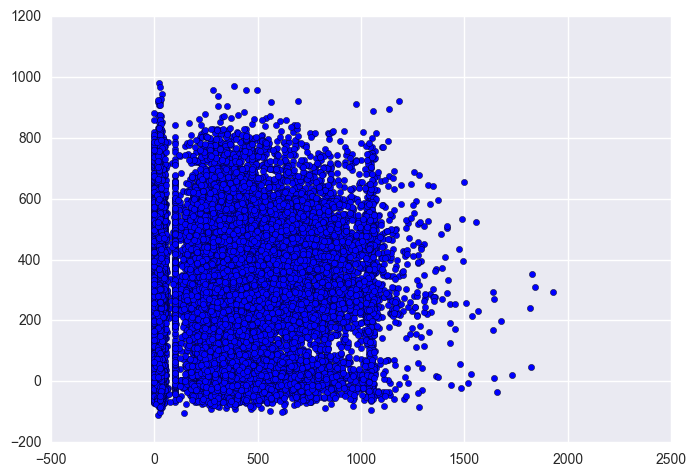

In [221]:
plt.scatter( x=y_test, y=Y_predict)
plt.savefig('rateindi-pred-real')

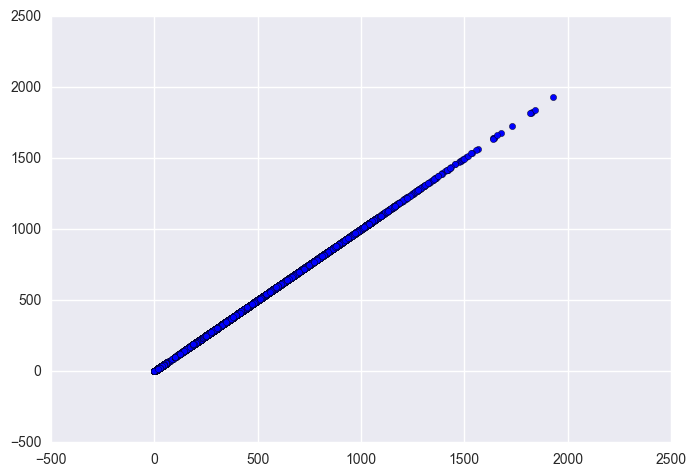

In [222]:
plt.scatter( x=y_test, y=y_test)
plt.savefig('rateindi-real-real')

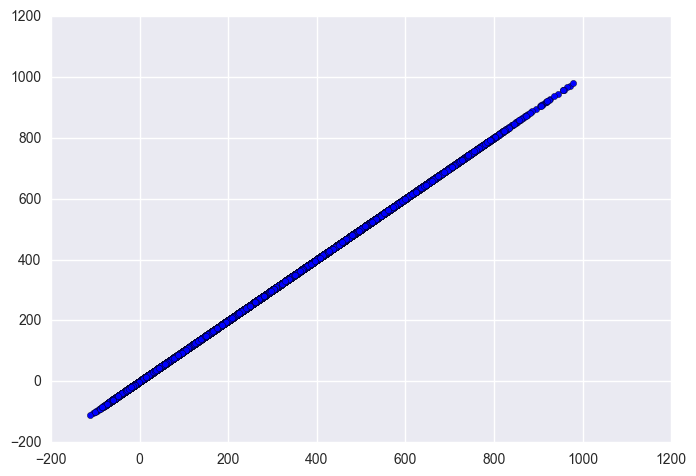

In [223]:
plt.scatter( x=Y_predict, y=Y_predict)
plt.savefig('rateindi-real-real')

In [175]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)

In [176]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([  5.00000e+09,   3.78232e+09, ...,   6.60971e-03,   5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='mean_squared_error', store_cv_values=False)

In [177]:
ridgecv.alpha_

0.0050000000000000001

In [178]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

43501.926166940786

In [179]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)

In [180]:
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [181]:
lasso = Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

43386.194257661991

In [224]:
# R2 Score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor,BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

def lets_try(X_train,y_train):
    results={}
    def test_model(clf):
        
        #cv = KFold(n_splits=5,shuffle=True,random_state=45)
        cv=5
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    #clf = sm.HuberRegressor()
    #results["Hubber"]=test_model(clf)

    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0,1])
    return results

lets_try(X_train,y_train)

In [225]:
def test_model(clf):
    #cv = KFold(n_splits=5,shuffle=True,random_state=45)
    cv=5
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring=r2)
    scores=[r2_val_score.mean()]
    return scores


In [184]:
results={}
clf = linear_model.Lasso(alpha=1e-4)
results["Lasso"]=test_model(clf)
results["Lasso"]

[0.4898685715569977]

In [185]:
clf = BaggingRegressor()
results["Bagging"]=test_model(clf)
results["Bagging"]

[0.53289031761022732]

In [186]:
clf = RandomForestRegressor()
results["RandomForest"]=test_model(clf)
results["RandomForest"]

[0.5322558649527398]

In [187]:
clf = AdaBoostRegressor()
results["AdaBoost"]=test_model(clf)
results["AdaBoost"]
    

[-0.089637723364035166]

In [230]:
clf = svm.SVR()
results["SVM RBF"]=test_model(clf)
results["SVM RBF"]
    

[0.17845076864199921]

In [227]:
clf = linear_model.LinearRegression()
results["Linear"]=test_model(clf)
results["Linear"]   

[0.49429214795629822]

In [228]:
clf = linear_model.Ridge()
results["Ridge"]=test_model(clf)
results["Ridge"]
    

[0.49423948808715085]

In [229]:
clf = linear_model.BayesianRidge()
results["Bayesian Ridge"]=test_model(clf)
results["Bayesian Ridge"]

[0.49421950153520805]

In [193]:
1+1

2

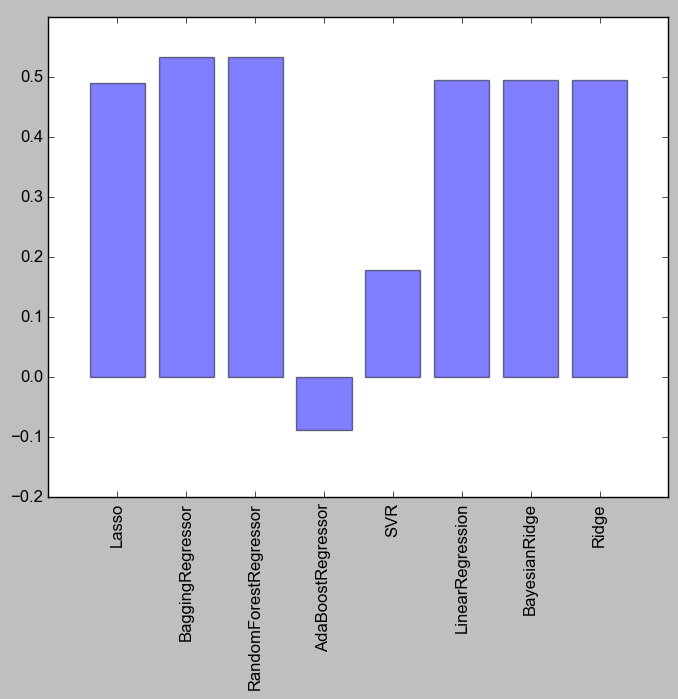

In [253]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Lasso','BaggingRegressor','RandomForestRegressor','AdaBoostRegressor','SVR','LinearRegression','BayesianRidge','Ridge')
y_pos = np.arange(len(objects))
performance = [ 0.4898685715569977,0.53289031761022732,0.5322558649527398,-0.089637723364035166,0.17845076864199921,0.49429214795629822,0.49421950153520805,0.49423948808715085]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylim(-0.2,0.6)
plt.xticks(rotation='vertical')
plt.show()




## change the target (tabacco user)
It is categorical variable, so I use

In [194]:
data_df.columns

Index([                           u'BusinessYear',
                                     u'StateCode',
                                  u'RatingAreaId',
                                       u'Tobacco',
                                           u'Age',
                                u'IndividualRate',
                                          u'days',
                                  u'Couple_extra',
        u'PrimarySubscriberAndOneDependent_extra',
       u'PrimarySubscriberAndTwoDependents_extra',
       ...
                                      u'365_days',
                                      u'366_days',
                                      u'423_days',
                                      u'425_days',
                                      u'426_days',
                                      u'517_days',
                                      u'698_days',
                                      u'729_days',
                                    u'33236_days',
                    

In [195]:
data_df["IndividualTobaccoRate_cat"] = 0
data_df["IndividualTobaccoRate_cat"][data_df["IndividualTobaccoRate_extra"] == 'Below_540'] = 1
data_df["IndividualTobaccoRate_cat"][data_df["IndividualTobaccoRate_extra"] == 'Above_540'] = 2

In [196]:
data_df["IndividualTobaccoRate_cat"].describe()

count    126212.000000
mean          0.543261
std           0.742521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: IndividualTobaccoRate_cat, dtype: float64

In [197]:
from sklearn.cross_validation import train_test_split
X = df_copy
y= data_df.IndividualTobaccoRate_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(100969, 172) (100969,)
(25243, 172) (25243,)


In [198]:
import pandas as pd 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import RandomForestClassifier

In [200]:
knn = KNeighborsClassifier()
model =knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.89030622350750699

In [201]:
confusion_matrix(y_test, y_pred)

array([[15246,   114,    41],
       [  313,  5243,   553],
       [  256,  1492,  1985]])

In [202]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.95258091352057994

In [203]:
confusion_matrix(y_test, y_pred)

array([[15401,     0,     0],
       [   57,  5566,   486],
       [   27,   627,  3079]])

In [204]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9450936893396189

In [205]:
confusion_matrix(y_test, y_pred)

array([[15370,    22,     9],
       [   42,  5523,   544],
       [   26,   743,  2964]])

In [209]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8101255793685378

In [210]:
confusion_matrix(y_test, y_pred)

array([[12165,  1688,  1548],
       [   28,  5113,   968],
       [   17,   544,  3172]])

In [213]:
# Support Vector Machines

svc = svm.SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.94469753991205485

In [214]:
confusion_matrix(y_test, y_pred)

array([[15401,     0,     0],
       [   57,  5480,   572],
       [   27,   740,  2966]])

In [215]:
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.93233767777205567

In [216]:
confusion_matrix(y_test, y_pred)

array([[15401,     0,     0],
       [   82,  5744,   283],
       [   81,  1262,  2390]])

In [217]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.93752723527314508

In [218]:
confusion_matrix(y_test, y_pred)

array([[15370,    13,    18],
       [   51,  5451,   607],
       [   26,   862,  2845]])

In [ ]:
## hange the 

In [231]:
data_df["Couple_extra"].describe()

count             126212
unique                 3
top       Not_Applicable
freq              125777
Name: Couple_extra, dtype: object

In [232]:
data_df["Couple_extra_cat"] = 0
data_df["Couple_extra_cat"][data_df["Couple_extra"] == 'Below_50'] = 1
data_df["Couple_extra_cat"][data_df["Couple_extra"] == 'Above_50'] = 2

In [233]:
data_df["Couple_extra_cat"].describe()

count    126212.000000
mean          0.005158
std           0.092489
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Couple_extra_cat, dtype: float64

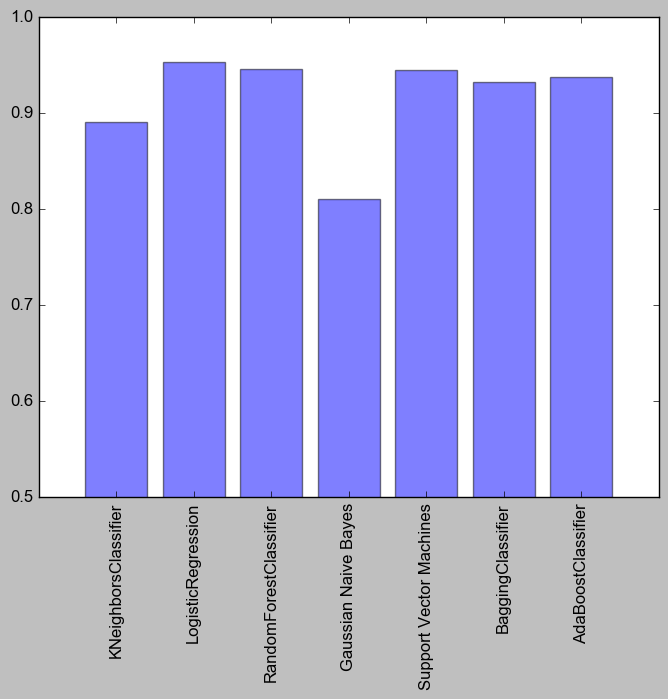

In [256]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('KNeighborsClassifier','LogisticRegression','RandomForestClassifier','Gaussian Naive Bayes','Support Vector Machines','BaggingClassifier','AdaBoostClassifier')
y_pos = np.arange(len(objects))
performance = [ 0.89030622350750699,0.95258091352057994,0.9450936893396189,0.8101255793685378,0.94469753991205485,0.93233767777205567,0.93752723527314508]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()




In [234]:
X = df_copy
y= data_df.Couple_extra_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(100969, 172) (100969,)
(25243, 172) (25243,)


In [235]:
knn = KNeighborsClassifier()
model =knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.99746464366358989

In [236]:
confusion_matrix(y_test, y_pred)

array([[25174,     0,     0],
       [   28,     4,     4],
       [   28,     4,     1]])

In [237]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.99873232183179494

In [238]:
confusion_matrix(y_test, y_pred)

array([[25174,     0,     0],
       [    0,    24,    12],
       [    0,    20,    13]])

In [239]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.99865309194628216

In [240]:
confusion_matrix(y_test, y_pred)

array([[25174,     0,     0],
       [    0,    25,    11],
       [    0,    23,    10]])

In [241]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.99873232183179494

In [242]:
confusion_matrix(y_test, y_pred)

array([[25174,     0,     0],
       [    0,     5,    31],
       [    0,     1,    32]])

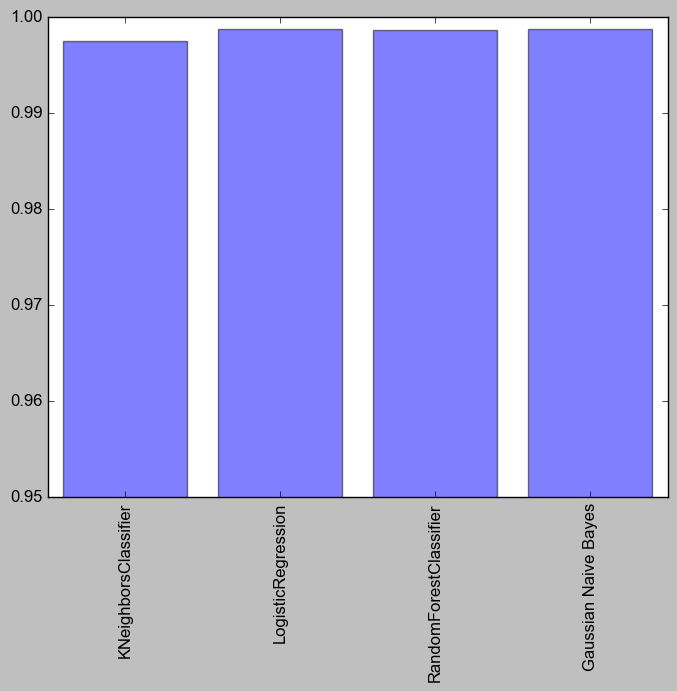

In [260]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('KNeighborsClassifier','LogisticRegression','RandomForestClassifier','Gaussian Naive Bayes')
y_pos = np.arange(len(objects))
performance = [0.99746464366358989,0.99873232183179494,0.99865309194628216,0.99873232183179494 ]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylim(0.95,1)
plt.xticks(rotation='vertical')
plt.show()






In [261]:
## prepare the test for 2017

In [631]:
test_df=copy.deepcopy(df_copy)

In [632]:
train_df=copy.deepcopy(df_copy)

In [633]:
test_df=test_df.drop([u'year_2015'],axis=1)

In [634]:
train_df=train_df.drop([u'year_2015'],axis=1)

In [635]:
train_df.head()

,year_2016,state_AL,state_AR,state_AZ,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,...,364 days,365 days,366 days,423 days,425 days,426 days,517 days,698 days,90 days,91 days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [636]:
train_df = train_df[train_df.year_2016 ==1]

In [637]:
test_df = test_df[test_df.year_2016 ==1]

In [640]:
test_df.shape

(42328, 170)

In [641]:
train_df['year_2016']=2016

In [642]:
test_df['year_2016']=2017

In [644]:
train_df.shape

(42328, 170)

In [645]:
y_raw=copy.deepcopy(data_df)

In [646]:
y_raw.head()

,BusinessYear,StateCode,RatingAreaId,Tobacco,Age,IndividualRate,days,Couple_extra,PrimarySubscriberAndOneDependent_extra,PrimarySubscriberAndTwoDependents_extra,...,364 days,365 days,366 days,423 days,425 days,426 days,517 days,698 days,90 days,91 days
0,2015,WI,Rating Area 1,No Preference,32,29.00,364 days,Not_Applicable,Not_Applicable,Not_Applicable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,GA,Rating Area 4,No Preference,53,11.81,364 days,Not_Applicable,Not_Applicable,Not_Applicable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,FL,Rating Area 56,No Preference,32,19.46,364 days,Not_Applicable,Not_Applicable,Not_Applicable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,GA,Rating Area 11,No Preference,54,21.38,364 days,Not_Applicable,Not_Applicable,Not_Applicable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,LA,Rating Area 8,Tobacco User/Non-Tobacco User,43,308.03,365 days,Not_Applicable,Not_Applicable,Not_Applicable,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [647]:
y_raw = y_raw[y_raw.BusinessYear ==2016]

In [648]:
y_raw.shape

(42328, 186)

In [682]:
y_train_1=y_raw.IndividualRate
y_train_1

4         308.03
9           0.00
13        348.60
17        379.55
21          0.00
23         18.49
24        522.41
27         19.47
28        349.25
37        754.00
39         41.32
47        485.12
48        670.77
49          6.60
57        428.84
58         29.44
63          0.00
67        526.32
71          0.00
72        761.00
73        641.69
76         24.11
81          0.00
82        538.21
86        740.76
87         26.18
90        313.36
91         37.54
97        287.32
98        536.67
           ...  
126852    395.18
126856    353.50
126857     38.11
126860      0.00
126862     13.90
126863    598.60
126865    349.52
126866    637.86
126876    771.93
126879    349.46
126881      0.00
126888     46.65
126889    171.25
126891    157.91
126898    449.96
126900    862.90
126901    479.93
126902    862.02
126910    426.99
126912     48.04
126913    592.42
126915    614.04
126919    611.04
126920    231.77
126924      0.00
126928     24.77
126933      0.00
126935    451.

In [651]:
y_raw["IndividualTobaccoRate_cat"] = 0
y_raw["IndividualTobaccoRate_cat"][y_raw["IndividualTobaccoRate_extra"] == 'Below_540'] = 1
y_raw["IndividualTobaccoRate_cat"][y_raw["IndividualTobaccoRate_extra"] == 'Above_540'] = 2

In [652]:
y_raw["Couple_cat"] = 0
y_raw["Couple_cat"][y_raw["Couple_extra"] == 'Below_50'] = 1
y_raw["Couple_cat"][y_raw["Couple_extra"] == 'Above_50'] = 2

In [654]:
y_train_2=y_raw.IndividualTobaccoRate_cat

In [655]:
y_train_3=y_raw.Couple_cat

In [659]:
y_train_3.max()

2

In [ ]:
## model 1

In [680]:
clf = linear_model.LinearRegression()
clf.fit(train_df, y_train_1)
y_pred_1= logreg.predict(test_df)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [684]:
x=len(y_pred_1)
x

42328

In [688]:
list_total=(y_pred_1-y_train_1)



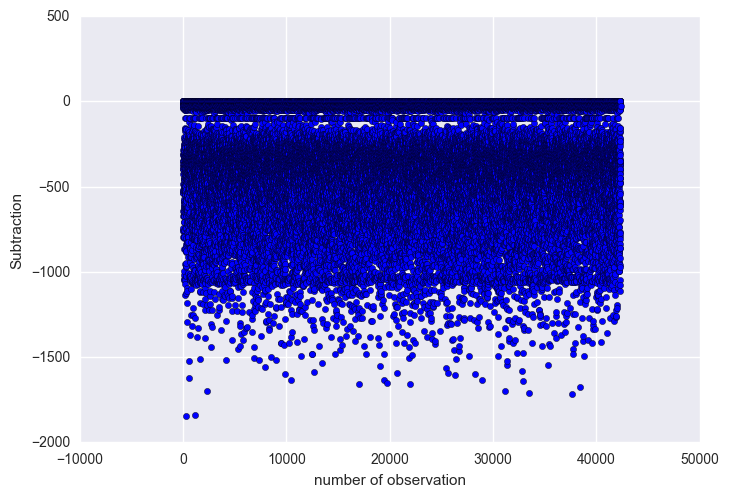

In [689]:
plt.scatter(x=range(0,x),y=list_total)
plt.ylabel('Subtraction')
plt.xlabel('number of observation')


In [ ]:
## model 2

In [662]:
logreg = LogisticRegression()
logreg.fit(train_df, y_train_2)
y_pred_2= logreg.predict(test_df)


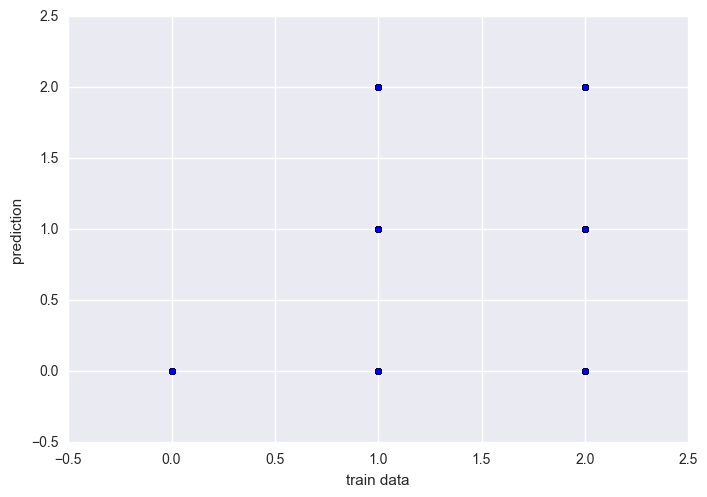

In [676]:
plt.scatter(x=y_train_2,y=y_pred_2)
plt.ylabel('prediction')
plt.xlabel('train data')

In [ ]:
## model 3

In [664]:
logreg = LogisticRegression()
logreg.fit(train_df, y_train_3)
y_pred_3= logreg.predict(test_df)
y_pred_3

array([0, 0, 0, ..., 0, 0, 0])

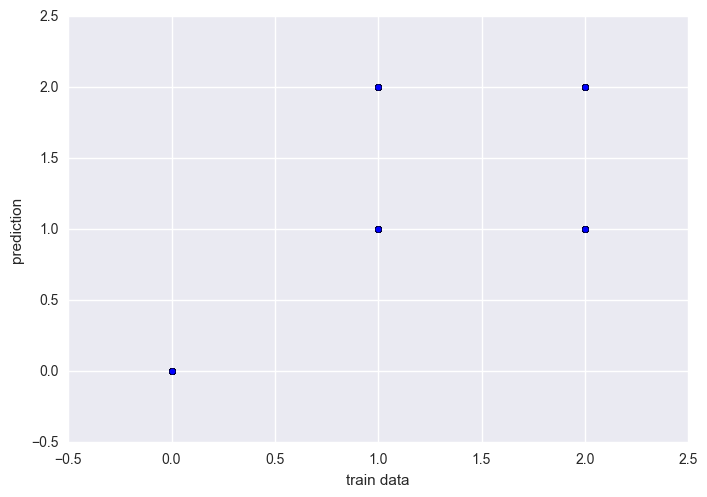

In [678]:
plt.scatter(x=y_train_3,y=y_pred_3)
plt.ylabel('prediction')
plt.xlabel('train data')

In [ ]:
##Not necessary

In [476]:
X_test_train = data_df

In [477]:
data_df.BusinessYear.describe()

count    126212.000000
mean       2015.036653
std           0.793064
min        2014.000000
25%        2014.000000
50%        2015.000000
75%        2016.000000
max        2016.000000
Name: BusinessYear, dtype: float64

In [620]:
data_df.shape

(126190, 186)

In [479]:
X_test_train.shape

(126212, 189)

In [480]:
X_test_train = X_test_train[X_test_train.BusinessYear ==2016]

In [413]:
X_test_train.head()

,BusinessYear,StateCode,RatingAreaId,Tobacco,Age,IndividualRate,days,Couple_extra,PrimarySubscriberAndOneDependent_extra,PrimarySubscriberAndTwoDependents_extra,...,366_days,423_days,425_days,426_days,517_days,698_days,729_days,33236_days,IndividualTobaccoRate_cat,Couple_extra_cat
5,2016,OK,Rating Area 2,No Preference,33,22.28,365 days,Not_Applicable,Not_Applicable,Not_Applicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,2016,FL,Rating Area 54,Tobacco User/Non-Tobacco User,65 and over,887.43,365 days,Not_Applicable,Not_Applicable,Not_Applicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
10,2016,OH,Rating Area 15,No Preference,39,20.84,365 days,Not_Applicable,Not_Applicable,Not_Applicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12,2016,IN,Rating Area 2,No Preference,0-20,184.86,91 days,Not_Applicable,Not_Applicable,Not_Applicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
15,2016,FL,Rating Area 39,No Preference,55,17.49,365 days,Not_Applicable,Not_Applicable,Not_Applicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [414]:
## create for test
XX_test=X_test_train

In [415]:
XX_test['BusinessYear']=2017

In [475]:
XX_test.shape

(42088, 345)

In [417]:
df_dummies_StateCode  = pd.get_dummies(X_test_train['StateCode'])


In [418]:
df_dummies_StateCode.columns


Index([u'AK', u'AL', u'AR', u'AZ', u'DE', u'FL', u'GA', u'HI', u'IA', u'IL',
       u'IN', u'KS', u'LA', u'ME', u'MI', u'MO', u'MS', u'MT', u'NC', u'ND',
       u'NE', u'NH', u'NJ', u'NM', u'NV', u'OH', u'OK', u'OR', u'PA', u'SC',
       u'SD', u'TN', u'TX', u'UT', u'VA', u'WI', u'WV', u'WY'],
      dtype='object')

In [419]:
df_dummies_StateCode.columns=[u'AK', u'AL', u'AR', u'AZ', u'DE', u'FL', u'GA', u'HI', u'IA', u'IL',
       u'IN', u'KS', u'LA', u'ME', u'MI', u'MO', u'MS', u'MT', u'NC', u'ND',
       u'NE', u'NH', u'NJ', u'NM', u'NV', u'OH', u'OK', u'OR', u'PA', u'SC',
       u'SD', u'TN', u'TX', u'UT', u'VA', u'WI', u'WV', u'WY']

df_dummies_StateCode.drop(['AK'], axis=1, inplace=True)
X_test_train =X_test_train.join(df_dummies_StateCode)

In [420]:
## test dataset

In [421]:
df_dummies_StateCode  = pd.get_dummies(XX_test['StateCode'])

In [422]:
df_dummies_StateCode.columns

Index([u'AK', u'AL', u'AR', u'AZ', u'DE', u'FL', u'GA', u'HI', u'IA', u'IL',
       u'IN', u'KS', u'LA', u'ME', u'MI', u'MO', u'MS', u'MT', u'NC', u'ND',
       u'NE', u'NH', u'NJ', u'NM', u'NV', u'OH', u'OK', u'OR', u'PA', u'SC',
       u'SD', u'TN', u'TX', u'UT', u'VA', u'WI', u'WV', u'WY'],
      dtype='object')

In [423]:
df_dummies_StateCode.columns=[u'AK', u'AL', u'AR', u'AZ', u'DE', u'FL', u'GA', u'HI', u'IA', u'IL',
       u'IN', u'KS', u'LA', u'ME', u'MI', u'MO', u'MS', u'MT', u'NC', u'ND',
       u'NE', u'NH', u'NJ', u'NM', u'NV', u'OH', u'OK', u'OR', u'PA', u'SC',
       u'SD', u'TN', u'TX', u'UT', u'VA', u'WI', u'WV', u'WY']
df_dummies_StateCode.drop(['AK'], axis=1, inplace=True)
XX_test =XX_test.join(df_dummies_StateCode)

In [424]:
## ratingArea

In [425]:
df_dummies_ratingArea  = pd.get_dummies(X_test_train['RatingAreaId'])

In [426]:
df_dummies_ratingArea.columns=[u'Rating Area 1', u'Rating Area 10', u'Rating Area 11',
       u'Rating Area 12', u'Rating Area 13', u'Rating Area 14',
       u'Rating Area 15', u'Rating Area 16', u'Rating Area 17',
       u'Rating Area 18', u'Rating Area 19', u'Rating Area 2',
       u'Rating Area 20', u'Rating Area 21', u'Rating Area 22',
       u'Rating Area 23', u'Rating Area 24', u'Rating Area 25',
       u'Rating Area 26', u'Rating Area 27', u'Rating Area 28',
       u'Rating Area 29', u'Rating Area 3', u'Rating Area 30',
       u'Rating Area 31', u'Rating Area 32', u'Rating Area 33',
       u'Rating Area 34', u'Rating Area 35', u'Rating Area 36',
       u'Rating Area 37', u'Rating Area 38', u'Rating Area 39',
       u'Rating Area 4', u'Rating Area 40', u'Rating Area 41',
       u'Rating Area 42', u'Rating Area 43', u'Rating Area 44',
       u'Rating Area 45', u'Rating Area 46', u'Rating Area 47',
       u'Rating Area 48', u'Rating Area 49', u'Rating Area 5',
       u'Rating Area 50', u'Rating Area 51', u'Rating Area 52',
       u'Rating Area 53', u'Rating Area 54', u'Rating Area 55',
       u'Rating Area 56', u'Rating Area 57', u'Rating Area 58',
       u'Rating Area 59', u'Rating Area 6', u'Rating Area 60',
       u'Rating Area 61', u'Rating Area 62', u'Rating Area 63',
       u'Rating Area 64', u'Rating Area 65', u'Rating Area 66',
       u'Rating Area 67', u'Rating Area 7', u'Rating Area 8',
       u'Rating Area 9']

In [427]:
df_dummies_ratingArea.drop(['Rating Area 1'], axis=1, inplace=True)
X_test_train =X_test_train.join(df_dummies_ratingArea)

In [428]:
##test(rating Area)

In [429]:
df_dummies_ratingArea  = pd.get_dummies(XX_test['RatingAreaId'])

In [430]:
df_dummies_ratingArea.columns=[u'Rating Area 1', u'Rating Area 10', u'Rating Area 11',
       u'Rating Area 12', u'Rating Area 13', u'Rating Area 14',
       u'Rating Area 15', u'Rating Area 16', u'Rating Area 17',
       u'Rating Area 18', u'Rating Area 19', u'Rating Area 2',
       u'Rating Area 20', u'Rating Area 21', u'Rating Area 22',
       u'Rating Area 23', u'Rating Area 24', u'Rating Area 25',
       u'Rating Area 26', u'Rating Area 27', u'Rating Area 28',
       u'Rating Area 29', u'Rating Area 3', u'Rating Area 30',
       u'Rating Area 31', u'Rating Area 32', u'Rating Area 33',
       u'Rating Area 34', u'Rating Area 35', u'Rating Area 36',
       u'Rating Area 37', u'Rating Area 38', u'Rating Area 39',
       u'Rating Area 4', u'Rating Area 40', u'Rating Area 41',
       u'Rating Area 42', u'Rating Area 43', u'Rating Area 44',
       u'Rating Area 45', u'Rating Area 46', u'Rating Area 47',
       u'Rating Area 48', u'Rating Area 49', u'Rating Area 5',
       u'Rating Area 50', u'Rating Area 51', u'Rating Area 52',
       u'Rating Area 53', u'Rating Area 54', u'Rating Area 55',
       u'Rating Area 56', u'Rating Area 57', u'Rating Area 58',
       u'Rating Area 59', u'Rating Area 6', u'Rating Area 60',
       u'Rating Area 61', u'Rating Area 62', u'Rating Area 63',
       u'Rating Area 64', u'Rating Area 65', u'Rating Area 66',
       u'Rating Area 67', u'Rating Area 7', u'Rating Area 8',
       u'Rating Area 9']

In [431]:
df_dummies_ratingArea.drop(['Rating Area 1'], axis=1, inplace=True)
XX_test =XX_test.join(df_dummies_ratingArea)

In [432]:
##train(Tobacco)

In [433]:
df_dummies_Tobacco= pd.get_dummies(X_test_train['Tobacco'])

In [434]:
df_dummies_Tobacco.columns=[u'No Preference', u'Tobacco User/Non-Tobacco User']

In [435]:
df_dummies_Tobacco.drop(['No Preference'], axis=1, inplace=True)
X_test_train =X_test_train.join(df_dummies_Tobacco)

In [436]:
##test(Tobacco)

In [437]:
df_dummies_Tobacco= pd.get_dummies(XX_test['Tobacco'])

In [438]:
df_dummies_Tobacco.columns=[u'No Preference', u'Tobacco User/Non-Tobacco User']

In [439]:
df_dummies_Tobacco.drop(['No Preference'], axis=1, inplace=True)
XX_test =XX_test.join(df_dummies_Tobacco)

In [440]:
##TRAIN AGE

In [445]:
df_dummies_age = pd.get_dummies(X_test_train['Age'])

In [446]:
df_dummies_age.columns

Index([u'0-20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38', u'39',
       u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48', u'49',
       u'50', u'51', u'52', u'53', u'54', u'55', u'56', u'57', u'58', u'59',
       u'60', u'61', u'62', u'63', u'64', u'65 and over', u'Family Option'],
      dtype='object')

In [447]:
df_dummies_age.columns=[u'0-20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38', u'39',
       u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48', u'49',
       u'50', u'51', u'52', u'53', u'54', u'55', u'56', u'57', u'58', u'59',
       u'60', u'61', u'62', u'63', u'64', u'65 and over', u'Family Option']

In [448]:
df_dummies_age.drop(['Family Option'], axis=1, inplace=True)
X_test_train =X_test_train.join(df_dummies_age)

In [ ]:
##test(Age)

In [449]:
df_dummies_age = pd.get_dummies(XX_test['Age'])

In [450]:
df_dummies_age.columns

Index([u'0-20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38', u'39',
       u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48', u'49',
       u'50', u'51', u'52', u'53', u'54', u'55', u'56', u'57', u'58', u'59',
       u'60', u'61', u'62', u'63', u'64', u'65 and over', u'Family Option'],
      dtype='object')

In [451]:
df_dummies_age.columns=[u'0-20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38', u'39',
       u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48', u'49',
       u'50', u'51', u'52', u'53', u'54', u'55', u'56', u'57', u'58', u'59',
       u'60', u'61', u'62', u'63', u'64', u'65 and over', u'Family Option']

In [452]:
df_dummies_age.drop(['Family Option'], axis=1, inplace=True)
XX_test =XX_test.join(df_dummies_age)

In [ ]:
##DAYS

In [457]:
df_dummies_days = pd.get_dummies(X_test_train['days'])

In [455]:
df_dummies_days .columns=[u'181 days', u'183 days', u'364 days', u'365 days', u'366 days',
       u'90 days', u'91 days']

In [458]:
df_dummies_days.drop(['181 days'], axis=1, inplace=True)
X_test_train =X_test_train.join(df_dummies_days)

In [ ]:
## test

In [464]:
df_dummies_days = pd.get_dummies(XX_test['days'])

In [465]:
df_dummies_days.columns=[u'181 days', u'183 days', u'364 days', u'365 days', u'366 days',
       u'90 days', u'91 days']

In [466]:
df_dummies_days.drop(['181 days'], axis=1, inplace=True)
XX_test =XX_test.join(df_dummies_days)

In [474]:
X_test_train.columns

Index([u'PrimarySubscriberAndThreeOrMoreDependents_extra',
                           u'CoupleAndOneDependent_extra',
                          u'CoupleAndTwoDependents_extra',
                  u'CoupleAndThreeOrMoreDependents_extra',
                           u'IndividualTobaccoRate_extra',
                                             u'year_2015',
                                             u'year_2016',
                                              u'state_AL',
                                              u'state_AR',
                                              u'state_AZ',
       ...
                                                    u'62',
                                                    u'63',
                                                    u'64',
                                           u'65 and over',
                                              u'183 days',
                                              u'364 days',
                                             

In [473]:
X_test_train=X_test_train.drop([u'BusinessYear',u'StateCode',
                                  u'RatingAreaId',
                                       u'Tobacco',
                                           u'Age',
                                u'IndividualRate',
                                          u'days',
                                  u'Couple_extra',
        u'PrimarySubscriberAndOneDependent_extra',
       u'PrimarySubscriberAndTwoDependents_extra'],axis=1)

In [ ]:
X_train = X_test_train
y= data_df.Couple_extra_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape